## Import Package

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import shutil
import os
import pickle
import matplotlib.pyplot as plt
# from config import config

import utils
import training
import testing
import model as md
import dataset as ds

## Parameter

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

code_names = ['code_1', 'code_2', 'code_3', 'code_4', 'code_mix']
train_code = code_names[4]
dir_name = 'ep500_dp01_2000_SNR2-7_FM150'
result_dir, config = utils.create_rec_dir(dir_name)


train_range = range(2,8)
# train_range = [2]
test_range = range(1,11)

In [3]:
print(f"Decoder")
print(f"Output_channels: {config['decoder']['output_channels']}")
print(f"Layer 1: {config['decoder']['layer_1']}")
print(f"Layer 2: {config['decoder']['layer_2']}")
print(f"Dropout rate: {config['decoder']['dropout']} \n")

print("Classifier")
print(f"Output_channels: {config['classifier']['output_channels']}")
print(f"Layer 1: {config['classifier']['layer_1']}")
print(f"Layer 2: {config['classifier']['layer_2']}")
print(f"Dropout rate: {config['classifier']['dropout']} \n")

print("Joint Decoder")
print(f"Output_channels: {config['joint_decoder']['output_channels']}")
print(f"Layer 1: {config['joint_decoder']['layer_1']}")
print(f"Layer 2: {config['joint_decoder']['layer_2']}")
print(f"Dropout rate: {config['joint_decoder']['dropout']} \n")

print("Joint Classifier")
print(f"Output_channels: {config['joint_classifier']['output_channels']}")
print(f"Layer 1: {config['joint_classifier']['layer_1']}")
print(f"Layer 2: {config['joint_classifier']['layer_2']}")
print(f"Dropout rate: {config['joint_classifier']['dropout']} \n")

Decoder
Output_channels: 150
Layer 1: 1000
Layer 2: 100
Dropout rate: 0.1 

Classifier
Output_channels: 150
Layer 1: 1000
Layer 2: 100
Dropout rate: 0.1 

Joint Decoder
Output_channels: 150
Layer 1: 1000
Layer 2: 100
Dropout rate: 0.1 

Joint Classifier
Output_channels: 150
Layer 1: 1000
Layer 2: 100
Dropout rate: 0.1 



## Train CNN (Baseline)

In [4]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=3)

Train CNN Model with SNR = 2 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.3528524935245514
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.24486583471298218
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.19779667258262634
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.17379166185855865
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.15818916261196136
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CNN_2L_2dB.pkl
Train CNN Model with SNR = 3 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.3436416685581207
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.22931332886219025
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.18050916492938995
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.15734750032424927
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.14192499220371246
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CNN_2L_3dB.pkl
Train CNN Model with SNR = 4 dB
Epoch 1 , tau: 0.9

## Train CCNN Joint

In [5]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=6)

Train CNN Model with SNR = 2 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.36213165521621704
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.23703666031360626
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.18535833060741425
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.15681666135787964
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.13852334022521973
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_Joint_2dB.pkl
Train CNN Model with SNR = 3 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.3417683243751526
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.20981666445732117
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.16093333065509796
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.1361691653728485
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.12158166617155075
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_Joint_3dB.pkl
Train CNN Model with SNR = 4 dB
Epoch 1 , 

## Train CCNN Joint 2 
Using the same one conv for both Decoder and Classifier

In [6]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=8)

Train CNN Model with SNR = 2 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.35239917039871216
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.22926749289035797
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.1832824945449829
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.15626749396324158
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.13907749950885773
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_Joint_2_2dB.pkl
Train CNN Model with SNR = 3 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.3691791594028473
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.25106415152549744
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.19399750232696533
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.16853083670139313
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.14942666888237
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_Joint_2_3dB.pkl
Train CNN Model with SNR = 4 dB
Epoch 1 ,

## Train CCNN Joint Gumbel

In [7]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=7)

Train CNN Model with SNR = 2 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.36031416058540344
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.2429324984550476
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.18479083478450775
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.15564082562923431
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.13970333337783813
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_Joint_Gumbel_2dB.pkl
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_clas_CCNN_Joint_Gumbel_2dB.pkl
Train CNN Model with SNR = 3 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.36482667922973633
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.24968749284744263
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.18878667056560516
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.16092750430107117
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.1438891589641571
Saving records: /home/j

## Train CCNN Joint Gumbel 2
Using gumbel soft output as conditional input

In [8]:
for SNR_model in train_range:
    print(f"Train CCNN Joint Gumbel 2 Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=9)

Train CCNN Joint Gumbel 2 Model with SNR = 2 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.3704516589641571
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.2651216685771942
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.20553916692733765
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.17821583151817322
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.15474249422550201
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_Joint_Gumbel_2_2dB.pkl
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_clas_CCNN_Joint_Gumbel_2_2dB.pkl
Train CCNN Joint Gumbel 2 Model with SNR = 3 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.36956751346588135
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.2608475089073181
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.19810417294502258
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.16496333479881287
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.144106

## Train CCNN Independent (True)

In [9]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_model(device, config, result_dir, code_name=train_code, SNR=SNR_model, model_idx=5)

Train CNN Model with SNR = 2 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.35991916060447693
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.2360524982213974
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.18488916754722595
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.15922416746616364
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.14393582940101624
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_FM_2L_2dB.pkl
Train CNN Model with SNR = 3 dB
Epoch 1 , tau: 0.99
Epoch 1 , BER: 0.3390808403491974
Epoch 2 , tau: 0.9801
Epoch 2 , BER: 0.214375838637352
Epoch 3 , tau: 0.9702989999999999
Epoch 3 , BER: 0.16727083921432495
Epoch 4 , tau: 0.96059601
Epoch 4 , BER: 0.14021916687488556
Epoch 5 , tau: 0.9509900498999999
Epoch 5 , BER: 0.1206049993634224
Saving records: /home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/train/loss_CCNN_FM_2L_3dB.pkl
Train CNN Model with SNR = 4 dB
Epoch 1 , tau

## Test CNN (Baseline)

In [10]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=3, SNR_model=SNR_model, test_range=test_range)

SNR: 1 dB, BER: 0.0974333361
SNR: 2 dB, BER: 0.0840616673
SNR: 3 dB, BER: 0.0766891688
SNR: 4 dB, BER: 0.0735716671
SNR: 5 dB, BER: 0.0722550005
SNR: 6 dB, BER: 0.071844168
SNR: 7 dB, BER: 0.0716733336
SNR: 8 dB, BER: 0.0718058348
SNR: 9 dB, BER: 0.0716350004
SNR: 10 dB, BER: 0.071737498
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CNN_2L_code_1_2dB.pkl
SNR: 1 dB, BER: 0.0927133337
SNR: 2 dB, BER: 0.0787708312
SNR: 3 dB, BER: 0.0712266639
SNR: 4 dB, BER: 0.0682166666
SNR: 5 dB, BER: 0.0668741688
SNR: 6 dB, BER: 0.0666449964
SNR: 7 dB, BER: 0.0660691634
SNR: 8 dB, BER: 0.0662700012
SNR: 9 dB, BER: 0.0663858354
SNR: 10 dB, BER: 0.0663966686
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CNN_2L_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0982175022
SNR: 2 dB, BER: 0.0832550004
SNR: 3 dB, BER: 0.0749125034
SNR: 4 dB, BER: 0.0709716678
SNR: 5 dB, BER: 0.0696083307
SNR: 6 dB, BER: 0.0691950023
SNR: 7 dB,

## Test CCNN Joint

In [11]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=6, SNR_model=SNR_model, test_range=test_range)

SNR: 1 dB, BER: 0.1025350019
SNR: 2 dB, BER: 0.0905383304
SNR: 3 dB, BER: 0.0836666673
SNR: 4 dB, BER: 0.0811366662
SNR: 5 dB, BER: 0.0799750015
SNR: 6 dB, BER: 0.079581663
SNR: 7 dB, BER: 0.0795408338
SNR: 8 dB, BER: 0.0794941634
SNR: 9 dB, BER: 0.0791999996
SNR: 10 dB, BER: 0.0797775015
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_code_1_2dB.pkl
SNR: 1 dB, BER: 0.0844908357
SNR: 2 dB, BER: 0.0704324991
SNR: 3 dB, BER: 0.0625191629
SNR: 4 dB, BER: 0.0589183345
SNR: 5 dB, BER: 0.0579183325
SNR: 6 dB, BER: 0.0574333332
SNR: 7 dB, BER: 0.0576391667
SNR: 8 dB, BER: 0.0573575012
SNR: 9 dB, BER: 0.0572116673
SNR: 10 dB, BER: 0.0575466678
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0882341638
SNR: 2 dB, BER: 0.0736383349
SNR: 3 dB, BER: 0.0659874976
SNR: 4 dB, BER: 0.0623016655
SNR: 5 dB, BER: 0.0614250004
SNR: 6 dB, BER: 0.0608099997
S

## Test CCNN Joint 2

In [12]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=8, SNR_model=SNR_model, test_range=test_range)

SNR: 1 dB, BER: 0.083632499
SNR: 2 dB, BER: 0.0704916641
SNR: 3 dB, BER: 0.0627766699
SNR: 4 dB, BER: 0.0598650016
SNR: 5 dB, BER: 0.058805
SNR: 6 dB, BER: 0.0581949987
SNR: 7 dB, BER: 0.0584000014
SNR: 8 dB, BER: 0.0582158342
SNR: 9 dB, BER: 0.0579449981
SNR: 10 dB, BER: 0.0580700003
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_2_code_1_2dB.pkl
SNR: 1 dB, BER: 0.1057008356
SNR: 2 dB, BER: 0.0931091681
SNR: 3 dB, BER: 0.0858374983
SNR: 4 dB, BER: 0.0833000019
SNR: 5 dB, BER: 0.081888333
SNR: 6 dB, BER: 0.0814216658
SNR: 7 dB, BER: 0.0815191641
SNR: 8 dB, BER: 0.0814308301
SNR: 9 dB, BER: 0.0813958347
SNR: 10 dB, BER: 0.0814841688
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_2_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0784258321
SNR: 2 dB, BER: 0.0633116663
SNR: 3 dB, BER: 0.0549516678
SNR: 4 dB, BER: 0.0509741679
SNR: 5 dB, BER: 0.0496799983
SNR: 6 dB, BER: 0.0493766665
SN

## Test CCNN Joint Gumbel

SNR: 1 dB, BER: 0.0812600031
SNR: 2 dB, BER: 0.0647366643
SNR: 3 dB, BER: 0.0562391654
SNR: 4 dB, BER: 0.0518241674
SNR: 5 dB, BER: 0.0508583337
SNR: 6 dB, BER: 0.050416667
SNR: 7 dB, BER: 0.0503299981
SNR: 8 dB, BER: 0.0501558334
SNR: 9 dB, BER: 0.0499899983
SNR: 10 dB, BER: 0.0503433347
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_1_2dB.pkl
SNR: 1 dB, BER: 0.1023158357
SNR: 2 dB, BER: 0.0866800025
SNR: 3 dB, BER: 0.0780875012
SNR: 4 dB, BER: 0.0745133311
SNR: 5 dB, BER: 0.0731024966
SNR: 6 dB, BER: 0.0725466684
SNR: 7 dB, BER: 0.0728216693
SNR: 8 dB, BER: 0.0725708306
SNR: 9 dB, BER: 0.0725649968
SNR: 10 dB, BER: 0.0724783316
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_1_3dB.pkl
SNR: 1 dB, BER: 0.1058741659
SNR: 2 dB, BER: 0.0894666687
SNR: 3 dB, BER: 0.0808449984
SNR: 4 dB, BER: 0.0767733306
SNR: 5 dB, BER: 0.0753266662
SNR: 6 dB, BER: 

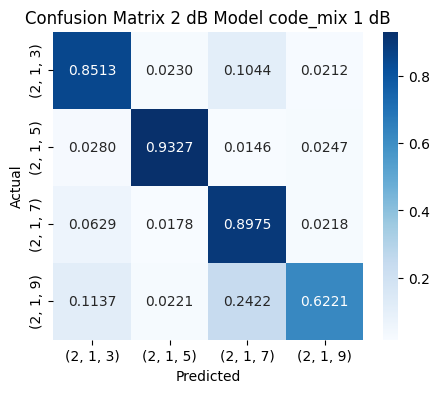

SNR: 2 dB, BER: 0.1242316663
SNR: 2 dB, ACC: 0.86399


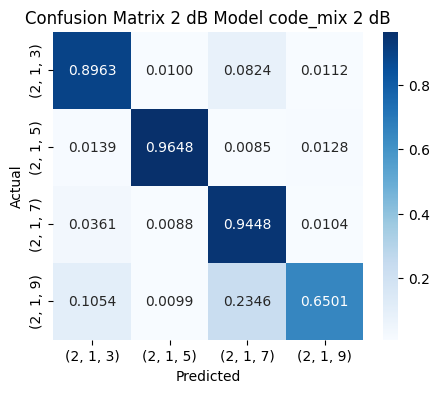

SNR: 3 dB, BER: 0.1164041683
SNR: 3 dB, ACC: 0.88668


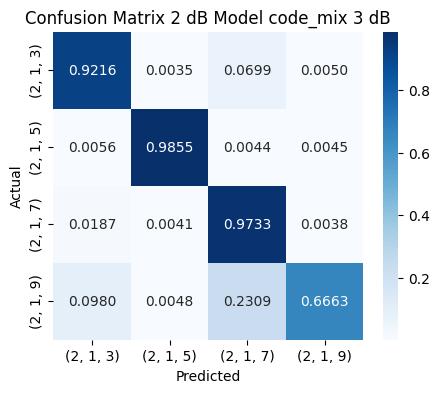

SNR: 4 dB, BER: 0.1129983366
SNR: 4 dB, ACC: 0.89486


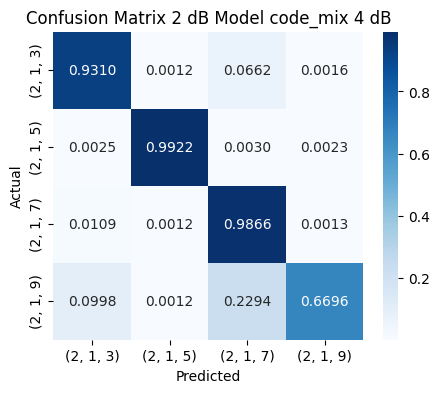

SNR: 5 dB, BER: 0.1117308363
SNR: 5 dB, ACC: 0.89841


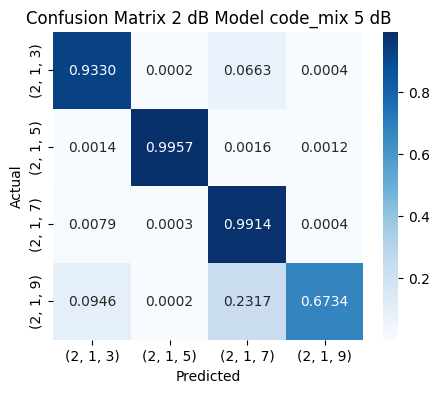

SNR: 6 dB, BER: 0.1111391634
SNR: 6 dB, ACC: 0.89935


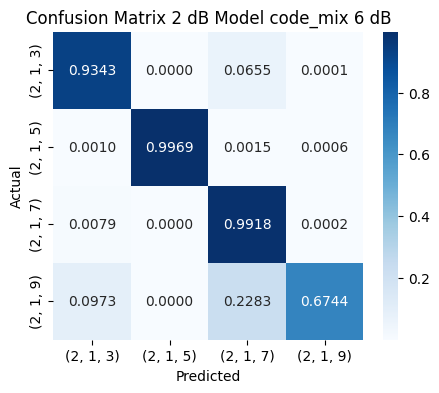

SNR: 7 dB, BER: 0.1113441661
SNR: 7 dB, ACC: 0.90216


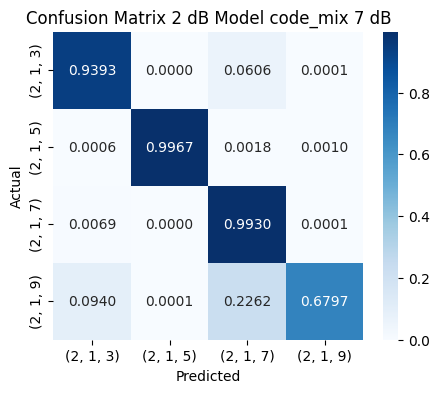

SNR: 8 dB, BER: 0.110999167
SNR: 8 dB, ACC: 0.90089


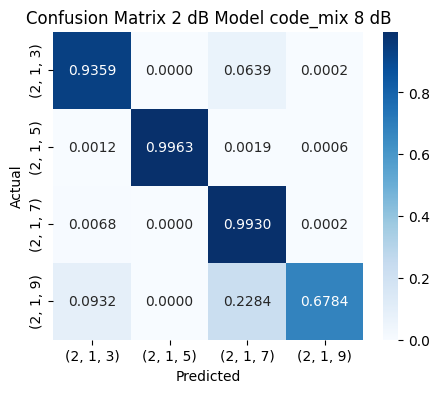

SNR: 9 dB, BER: 0.1112158298
SNR: 9 dB, ACC: 0.90039


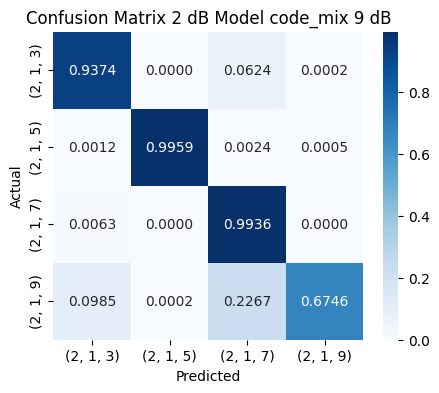

SNR: 10 dB, BER: 0.111194998
SNR: 10 dB, ACC: 0.89975


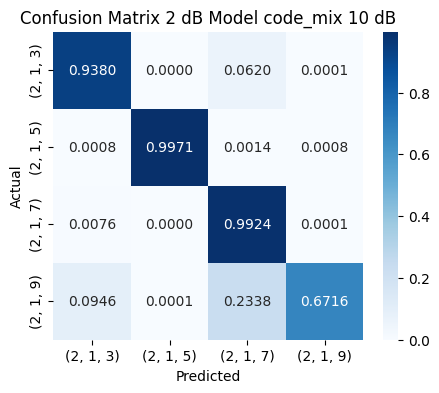

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_mix_2dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_code_mix_2dB.pkl
SNR: 1 dB, BER: 0.1508708298
SNR: 1 dB, ACC: 0.80993


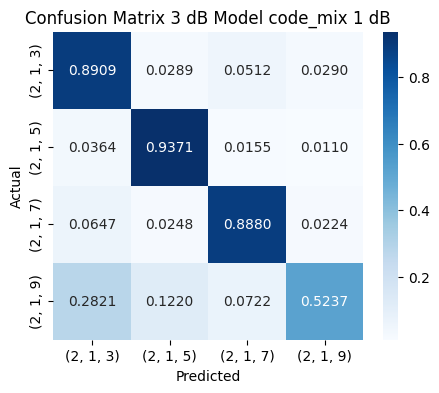

SNR: 2 dB, BER: 0.1361725032
SNR: 2 dB, ACC: 0.84658


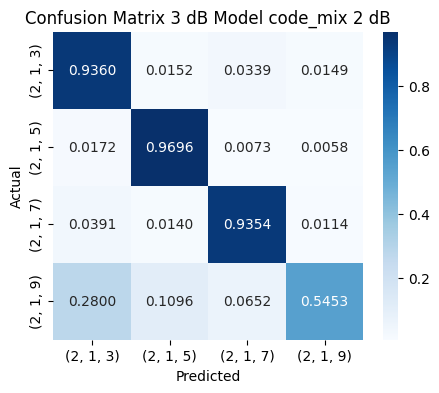

SNR: 3 dB, BER: 0.1283791661
SNR: 3 dB, ACC: 0.86431


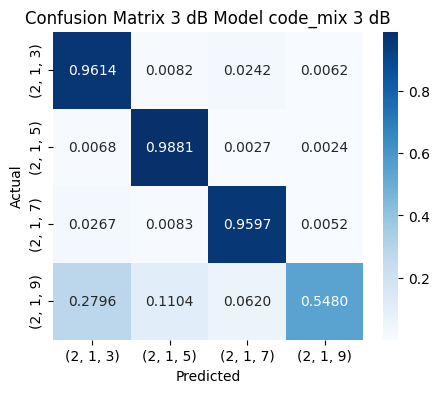

SNR: 4 dB, BER: 0.1254316717
SNR: 4 dB, ACC: 0.8736


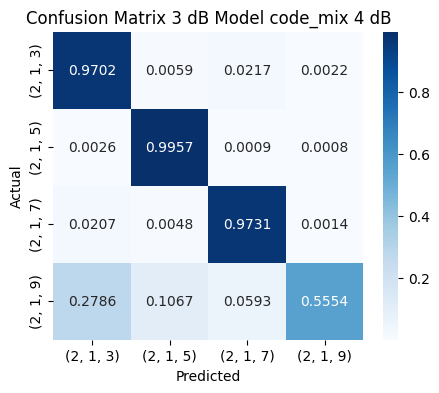

SNR: 5 dB, BER: 0.1237649992
SNR: 5 dB, ACC: 0.87778


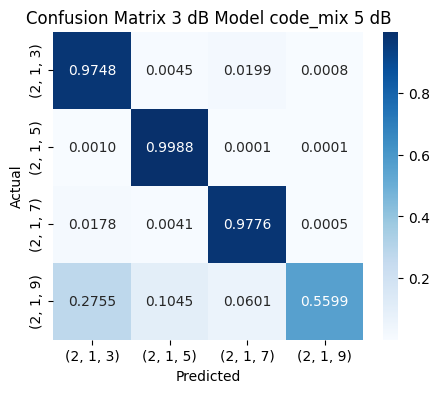

SNR: 6 dB, BER: 0.1234633327
SNR: 6 dB, ACC: 0.878


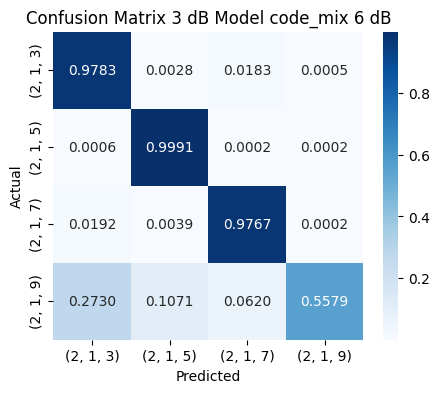

SNR: 7 dB, BER: 0.1234200001
SNR: 7 dB, ACC: 0.87706


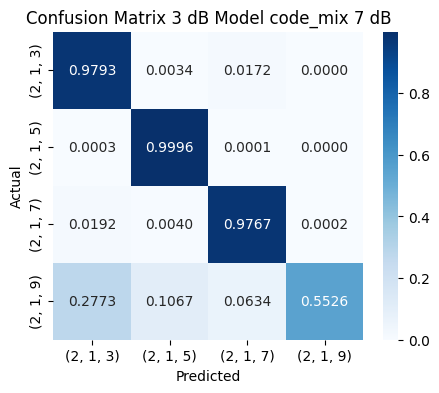

SNR: 8 dB, BER: 0.123165831
SNR: 8 dB, ACC: 0.87722


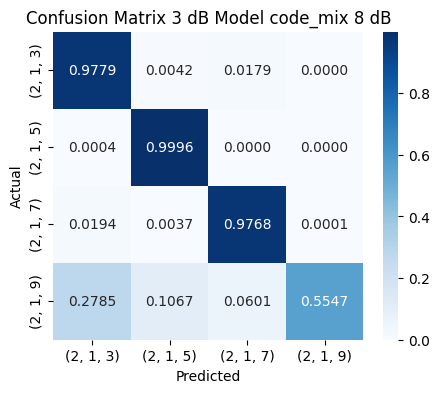

SNR: 9 dB, BER: 0.1230250001
SNR: 9 dB, ACC: 0.87722


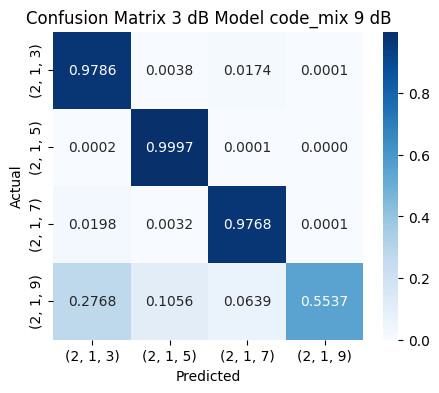

SNR: 10 dB, BER: 0.1231808364
SNR: 10 dB, ACC: 0.8779


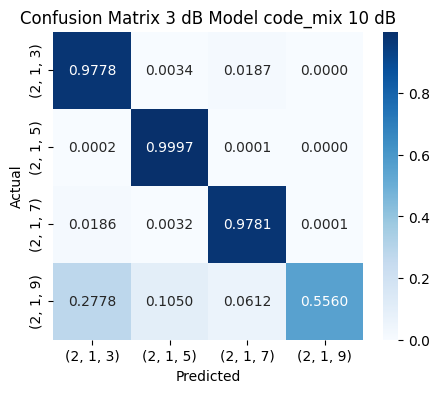

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_mix_3dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_code_mix_3dB.pkl
SNR: 1 dB, BER: 0.1551758349
SNR: 1 dB, ACC: 0.82746


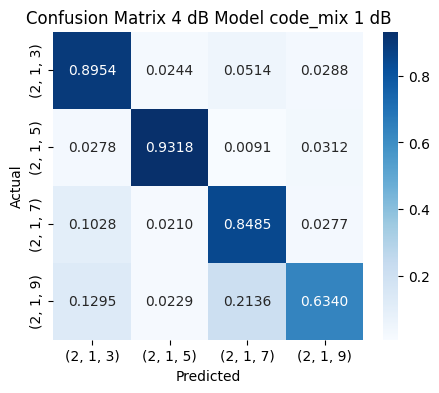

SNR: 2 dB, BER: 0.1397208273
SNR: 2 dB, ACC: 0.86555


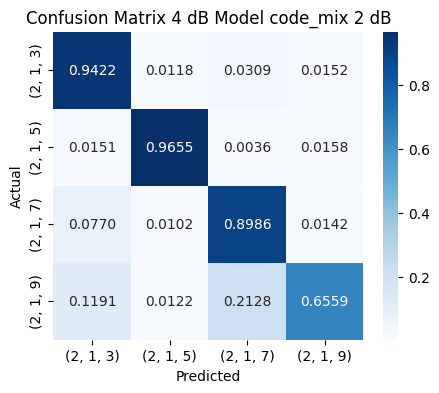

SNR: 3 dB, BER: 0.131780833
SNR: 3 dB, ACC: 0.8895


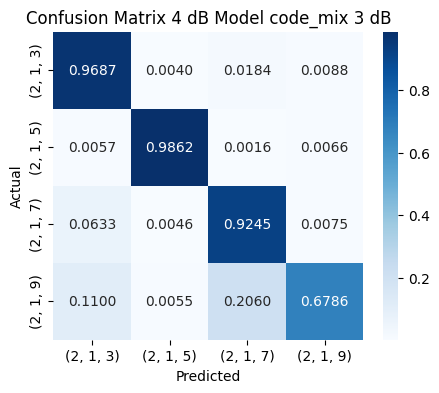

SNR: 4 dB, BER: 0.1278033257
SNR: 4 dB, ACC: 0.899


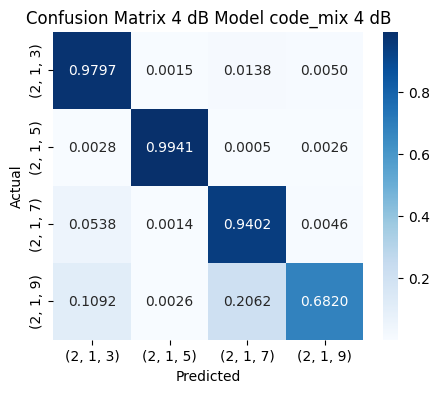

SNR: 5 dB, BER: 0.1266291738
SNR: 5 dB, ACC: 0.90103


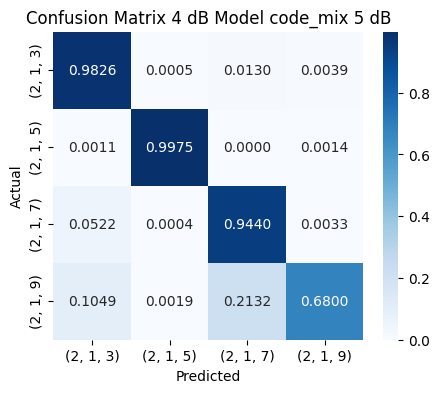

SNR: 6 dB, BER: 0.1263124943
SNR: 6 dB, ACC: 0.90235


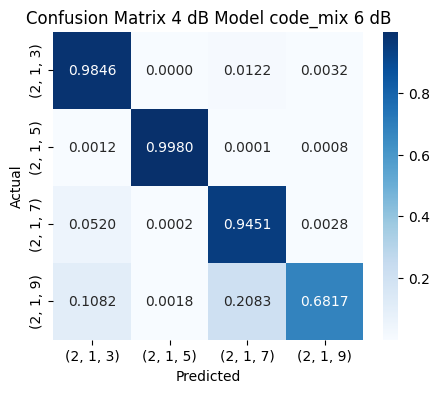

SNR: 7 dB, BER: 0.1257150024
SNR: 7 dB, ACC: 0.90442


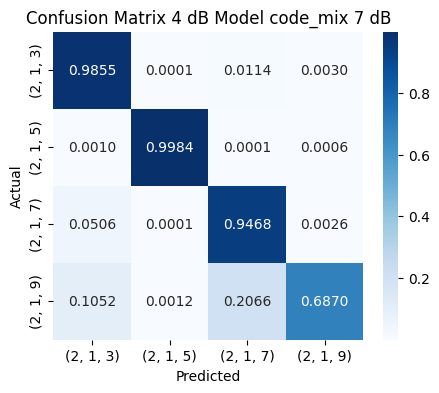

SNR: 8 dB, BER: 0.1261633337
SNR: 8 dB, ACC: 0.90416


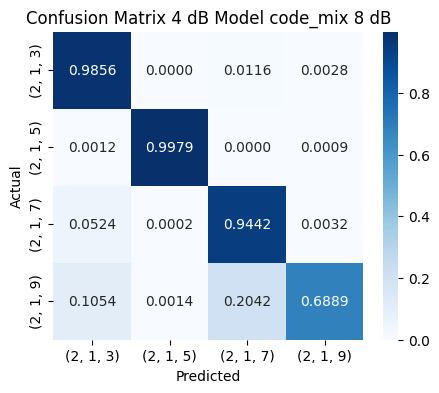

SNR: 9 dB, BER: 0.1262091696
SNR: 9 dB, ACC: 0.90391


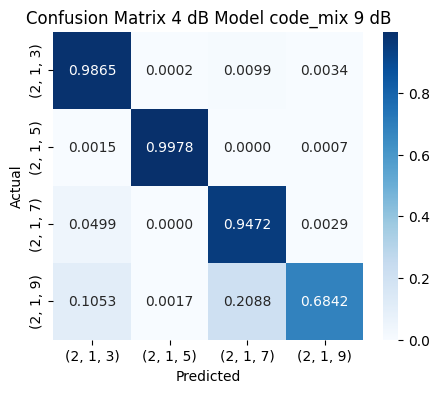

SNR: 10 dB, BER: 0.1259158403
SNR: 10 dB, ACC: 0.90417


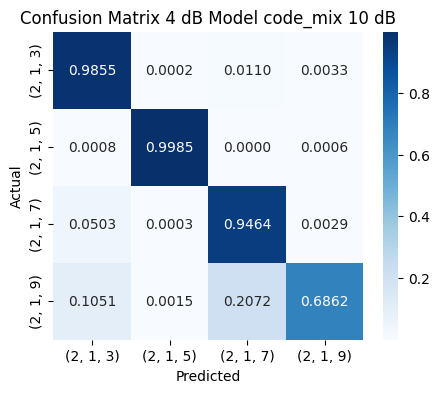

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_mix_4dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_code_mix_4dB.pkl
SNR: 1 dB, BER: 0.1366841644
SNR: 1 dB, ACC: 0.90508


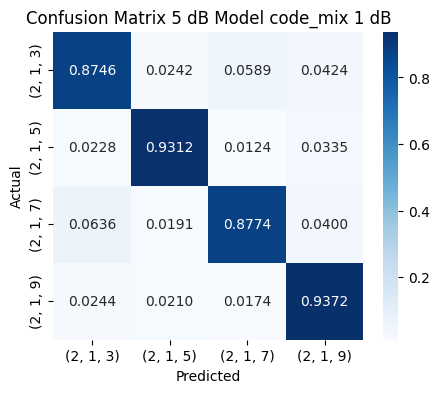

SNR: 2 dB, BER: 0.1183508337
SNR: 2 dB, ACC: 0.94797


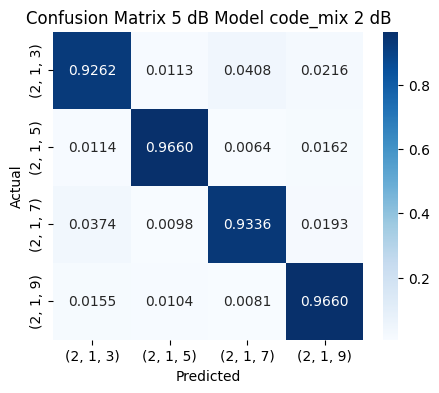

SNR: 3 dB, BER: 0.1083175018
SNR: 3 dB, ACC: 0.97279


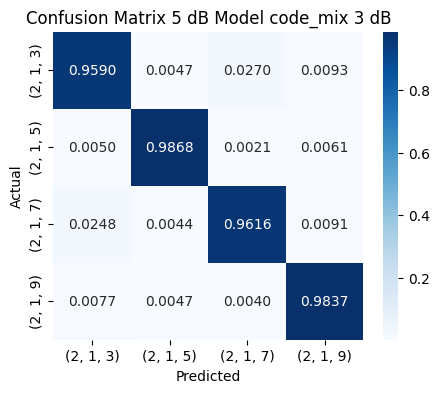

SNR: 4 dB, BER: 0.1040574983
SNR: 4 dB, ACC: 0.98366


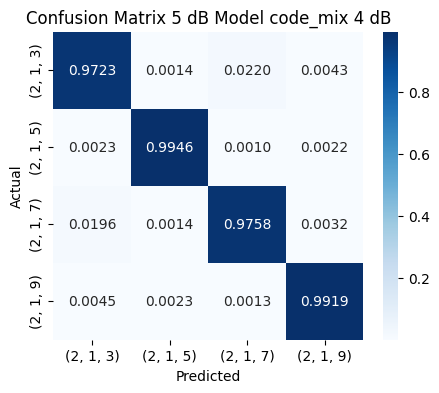

SNR: 5 dB, BER: 0.1022166684
SNR: 5 dB, ACC: 0.9878


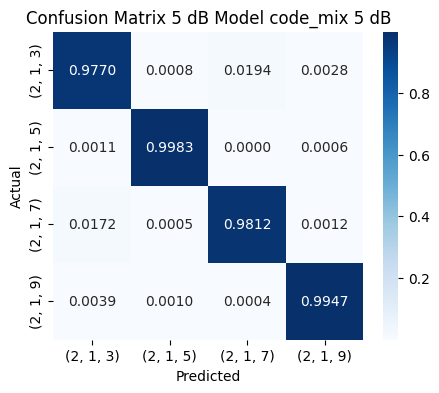

SNR: 6 dB, BER: 0.1018766686
SNR: 6 dB, ACC: 0.98915


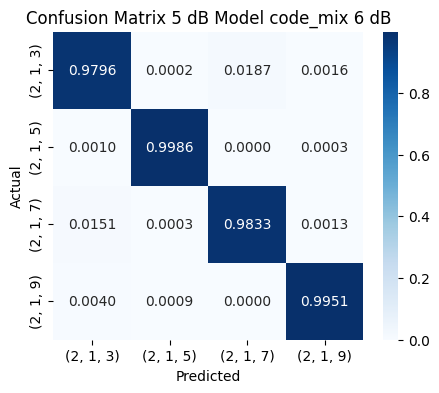

SNR: 7 dB, BER: 0.1021424979
SNR: 7 dB, ACC: 0.98933


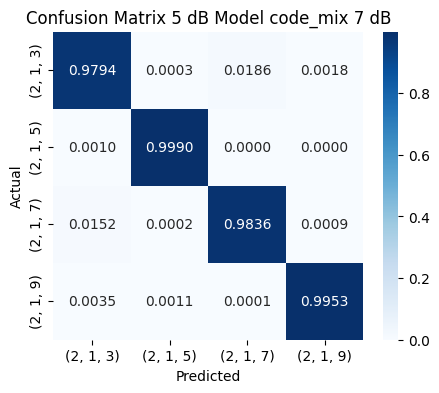

SNR: 8 dB, BER: 0.1016575024
SNR: 8 dB, ACC: 0.98904


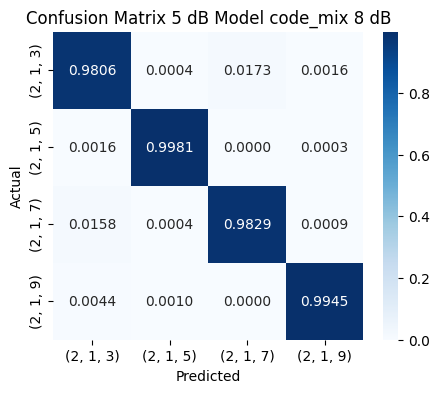

SNR: 9 dB, BER: 0.1014975011
SNR: 9 dB, ACC: 0.98893


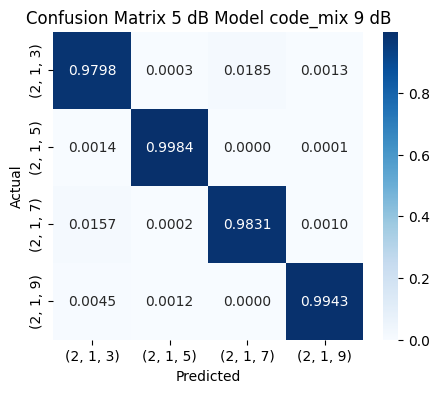

SNR: 10 dB, BER: 0.1018141657
SNR: 10 dB, ACC: 0.98922


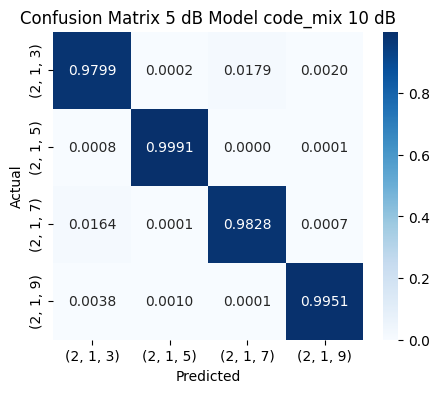

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_mix_5dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_code_mix_5dB.pkl
SNR: 1 dB, BER: 0.1408791691
SNR: 1 dB, ACC: 0.79013


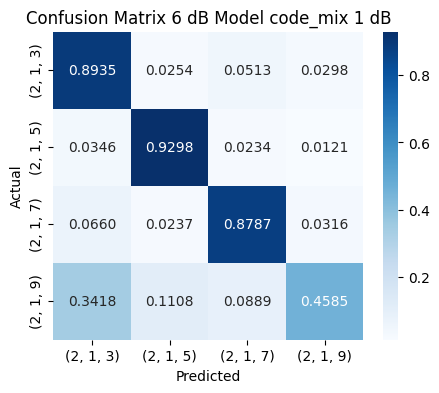

SNR: 2 dB, BER: 0.1243858337
SNR: 2 dB, ACC: 0.82671


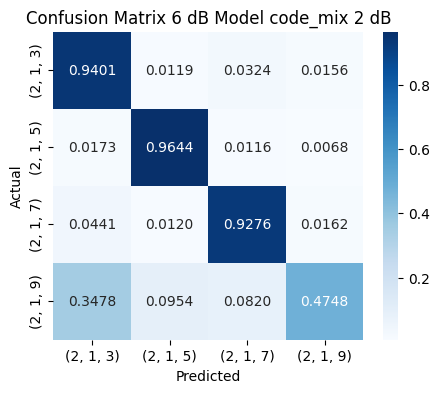

SNR: 3 dB, BER: 0.114729166
SNR: 3 dB, ACC: 0.84581


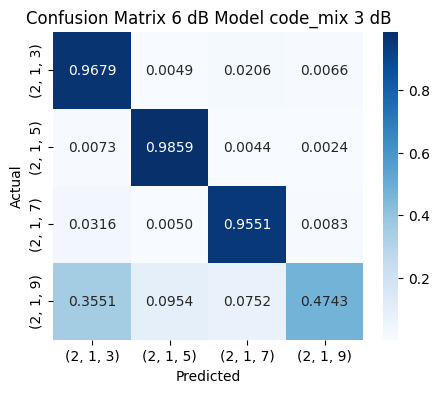

SNR: 4 dB, BER: 0.1107458323
SNR: 4 dB, ACC: 0.85606


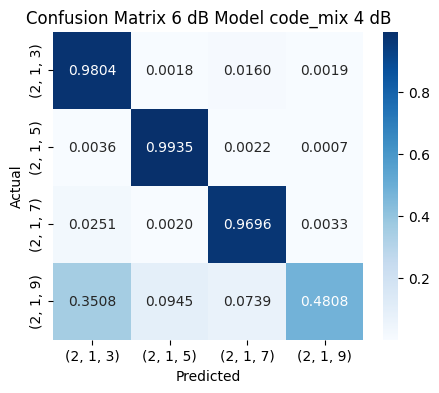

SNR: 5 dB, BER: 0.1093050018
SNR: 5 dB, ACC: 0.86023


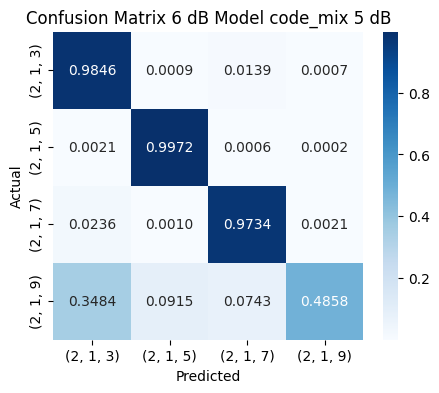

SNR: 6 dB, BER: 0.1088524982
SNR: 6 dB, ACC: 0.8604


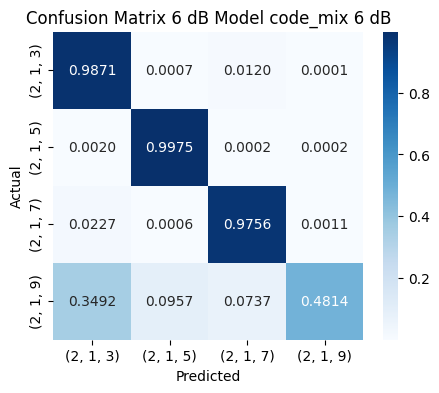

SNR: 7 dB, BER: 0.1086216643
SNR: 7 dB, ACC: 0.86033


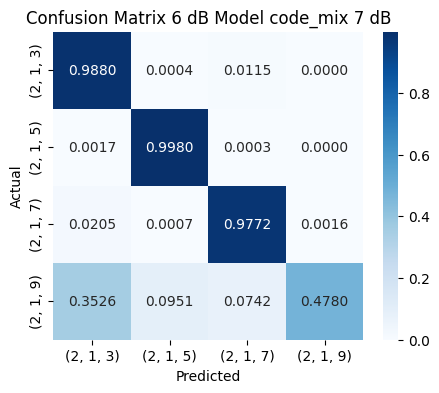

SNR: 8 dB, BER: 0.108630836
SNR: 8 dB, ACC: 0.85997


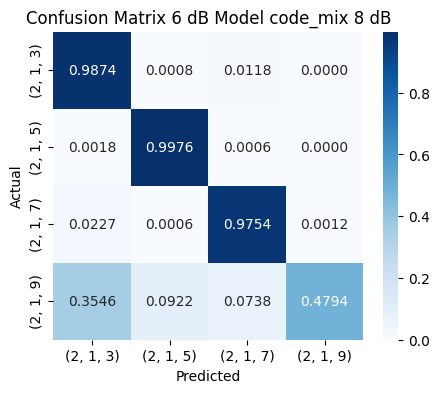

SNR: 9 dB, BER: 0.1088783294
SNR: 9 dB, ACC: 0.86034


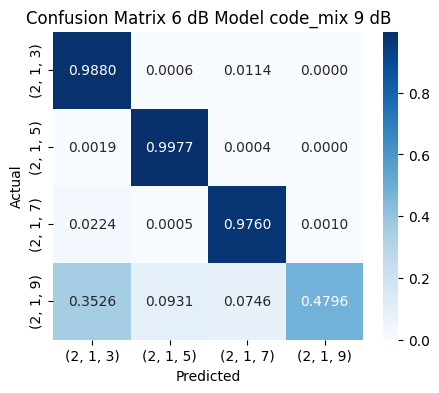

SNR: 10 dB, BER: 0.1089174971
SNR: 10 dB, ACC: 0.8599


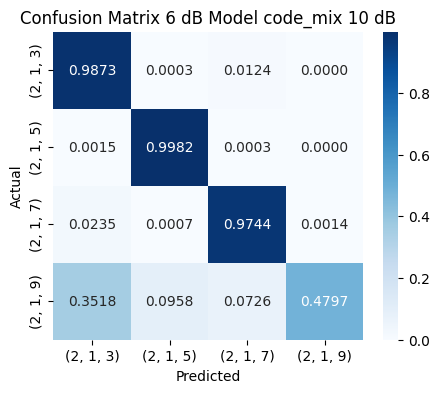

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_mix_6dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_code_mix_6dB.pkl
SNR: 1 dB, BER: 0.1425166726
SNR: 1 dB, ACC: 0.80969


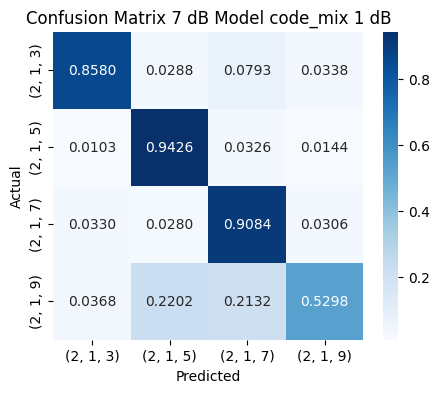

SNR: 2 dB, BER: 0.1255016625
SNR: 2 dB, ACC: 0.84728


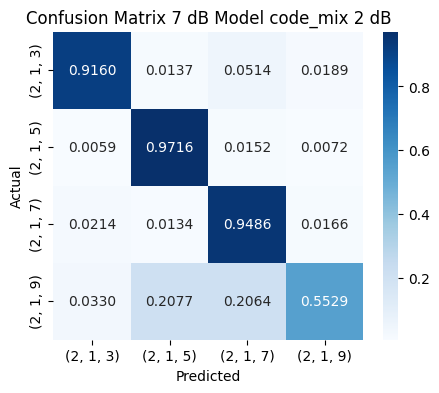

SNR: 3 dB, BER: 0.1155683324
SNR: 3 dB, ACC: 0.86676


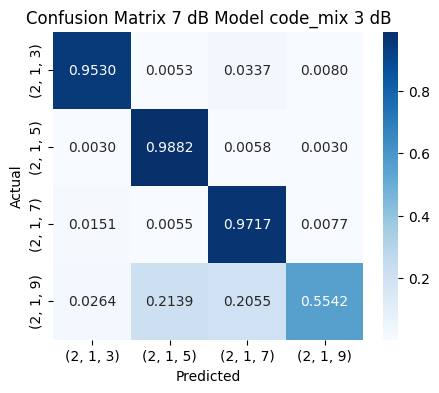

SNR: 4 dB, BER: 0.1120758355
SNR: 4 dB, ACC: 0.8768


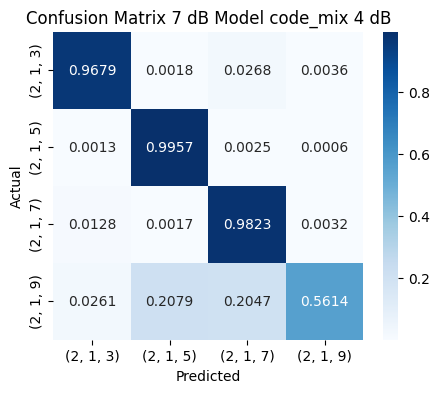

SNR: 5 dB, BER: 0.1104258299
SNR: 5 dB, ACC: 0.88102


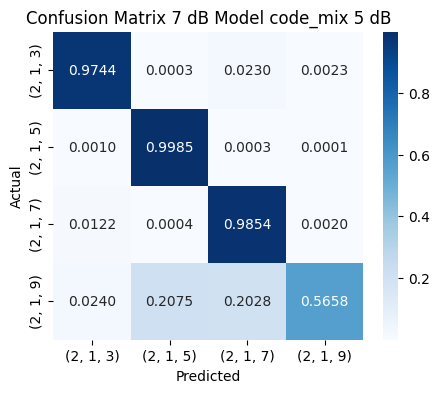

SNR: 6 dB, BER: 0.1099308357
SNR: 6 dB, ACC: 0.88124


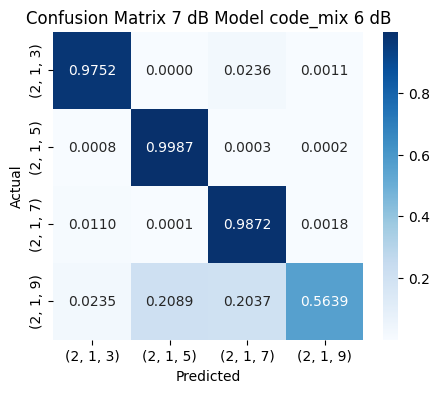

SNR: 7 dB, BER: 0.1097291633
SNR: 7 dB, ACC: 0.88005


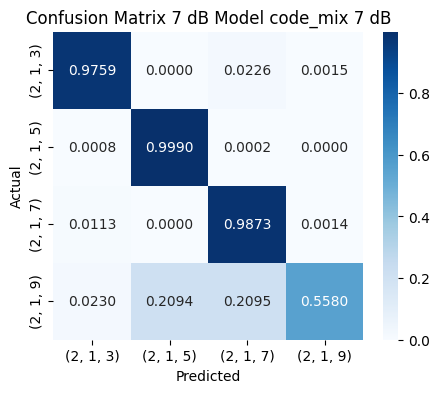

SNR: 8 dB, BER: 0.1098991632
SNR: 8 dB, ACC: 0.88036


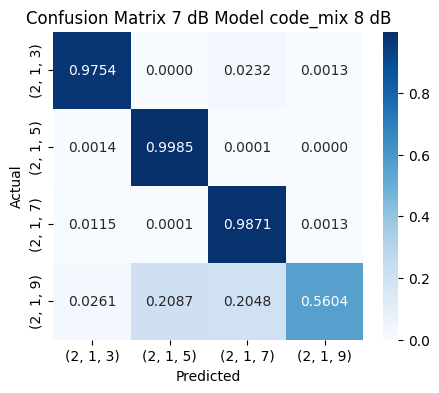

SNR: 9 dB, BER: 0.1097158343
SNR: 9 dB, ACC: 0.88095


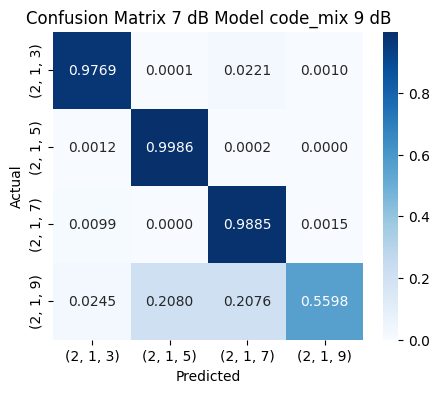

SNR: 10 dB, BER: 0.1098858342
SNR: 10 dB, ACC: 0.88095


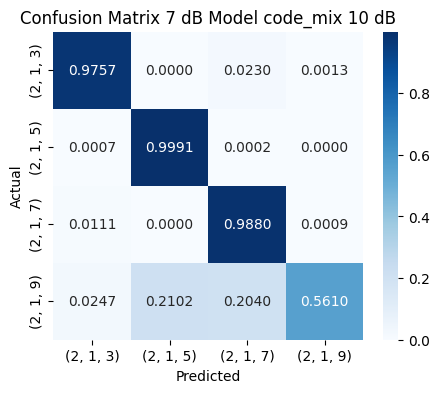

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_code_mix_7dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_code_mix_7dB.pkl


In [13]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=7, SNR_model=SNR_model, test_range=test_range)

## Test CCNN Joint Gumbel 2

SNR: 1 dB, BER: 0.1061533317
SNR: 2 dB, BER: 0.0904399976
SNR: 3 dB, BER: 0.0812508315
SNR: 4 dB, BER: 0.0776674971
SNR: 5 dB, BER: 0.0756525025
SNR: 6 dB, BER: 0.075681664
SNR: 7 dB, BER: 0.0757858306
SNR: 8 dB, BER: 0.0757058337
SNR: 9 dB, BER: 0.0753216669
SNR: 10 dB, BER: 0.0754041672
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_1_2dB.pkl
SNR: 1 dB, BER: 0.1059874967
SNR: 2 dB, BER: 0.0889333338
SNR: 3 dB, BER: 0.08002083
SNR: 4 dB, BER: 0.0761233345
SNR: 5 dB, BER: 0.0743916631
SNR: 6 dB, BER: 0.0741016641
SNR: 7 dB, BER: 0.0737133324
SNR: 8 dB, BER: 0.0739866644
SNR: 9 dB, BER: 0.0739291683
SNR: 10 dB, BER: 0.073890835
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0810166672
SNR: 2 dB, BER: 0.0615491681
SNR: 3 dB, BER: 0.0508750007
SNR: 4 dB, BER: 0.0461950004
SNR: 5 dB, BER: 0.0444024988
SNR: 6 dB, BER:

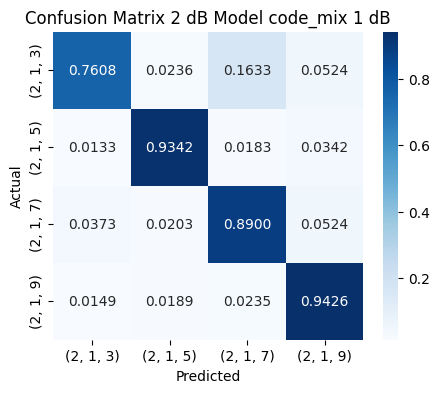

SNR: 2 dB, BER: 0.1385249943
SNR: 2 dB, ACC: 0.9218


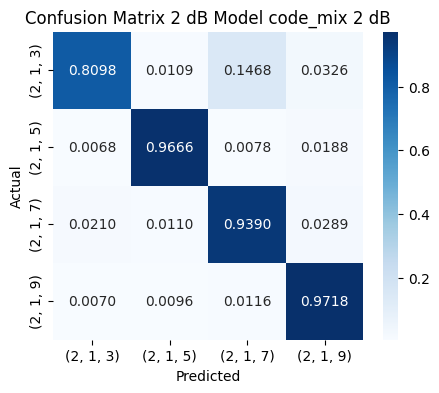

SNR: 3 dB, BER: 0.1311483383
SNR: 3 dB, ACC: 0.94428


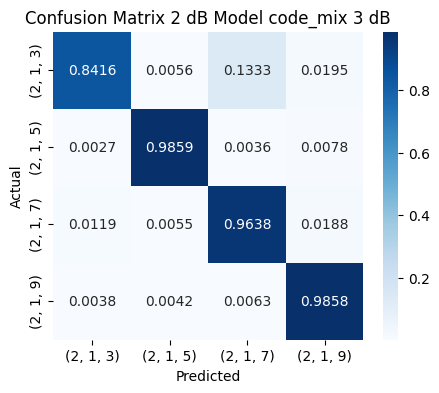

SNR: 4 dB, BER: 0.1283874959
SNR: 4 dB, ACC: 0.95553


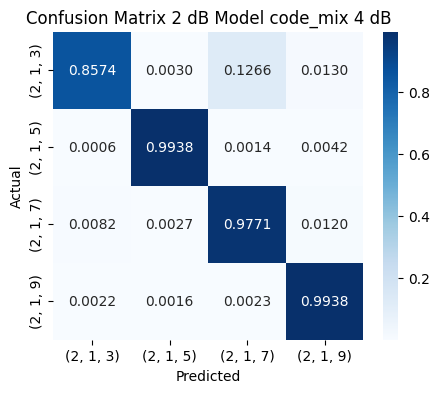

SNR: 5 dB, BER: 0.1267916709
SNR: 5 dB, ACC: 0.95831


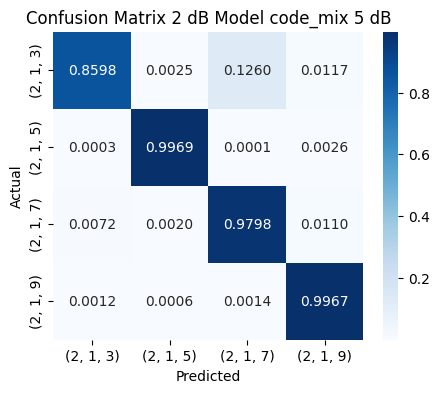

SNR: 6 dB, BER: 0.1265933365
SNR: 6 dB, ACC: 0.9588


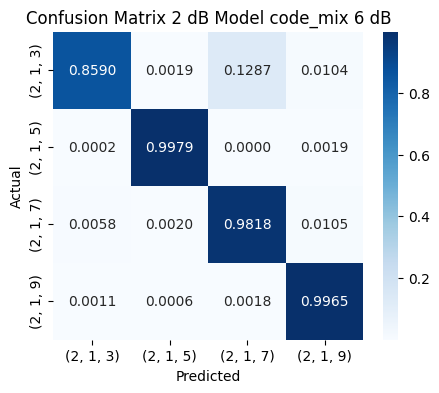

SNR: 7 dB, BER: 0.1265249997
SNR: 7 dB, ACC: 0.95917


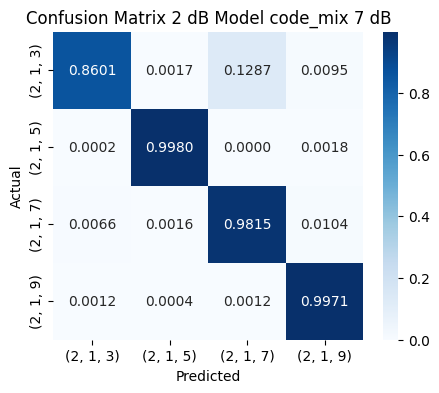

SNR: 8 dB, BER: 0.1264366657
SNR: 8 dB, ACC: 0.95864


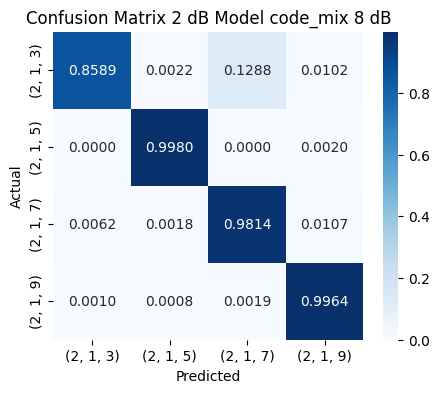

SNR: 9 dB, BER: 0.1264533401
SNR: 9 dB, ACC: 0.95926


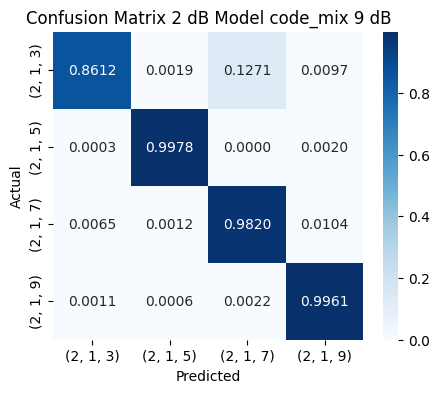

SNR: 10 dB, BER: 0.1265275031
SNR: 10 dB, ACC: 0.96018


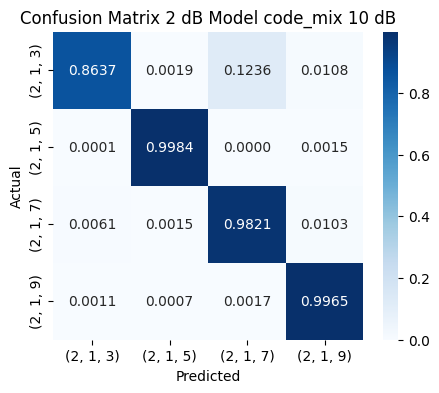

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_mix_2dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_2_code_mix_2dB.pkl
SNR: 1 dB, BER: 0.1521741599
SNR: 1 dB, ACC: 0.91066


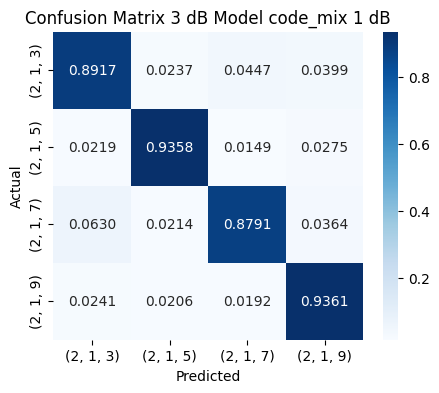

SNR: 2 dB, BER: 0.1374816597
SNR: 2 dB, ACC: 0.9501


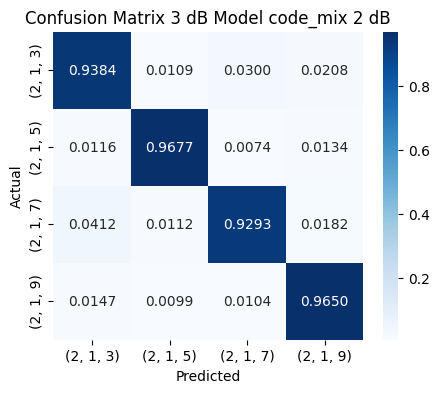

SNR: 3 dB, BER: 0.1289674938
SNR: 3 dB, ACC: 0.97315


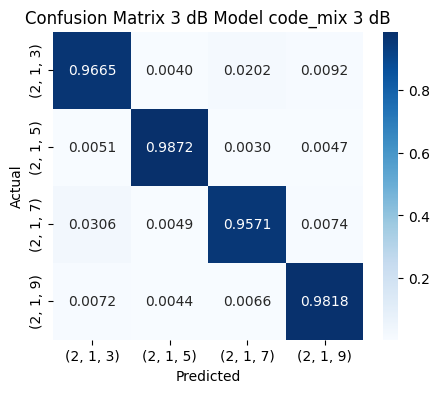

SNR: 4 dB, BER: 0.1259816736
SNR: 4 dB, ACC: 0.98338


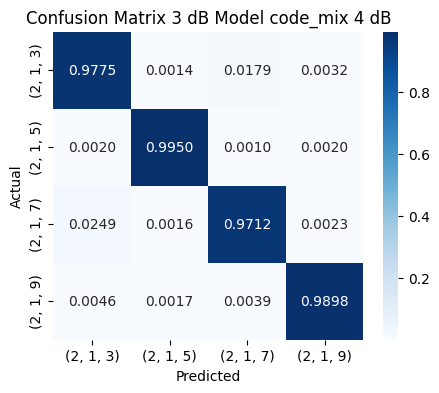

SNR: 5 dB, BER: 0.1241749972
SNR: 5 dB, ACC: 0.98644


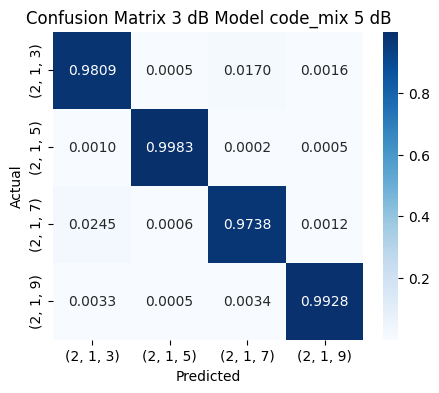

SNR: 6 dB, BER: 0.1239033341
SNR: 6 dB, ACC: 0.9882


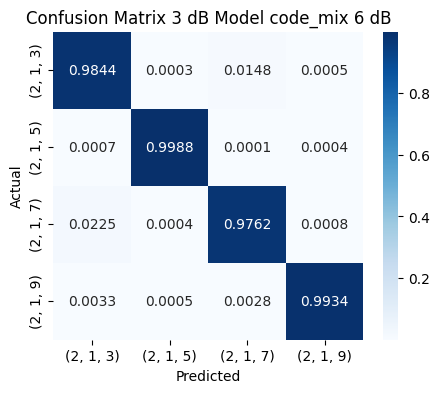

SNR: 7 dB, BER: 0.1235433295
SNR: 7 dB, ACC: 0.98879


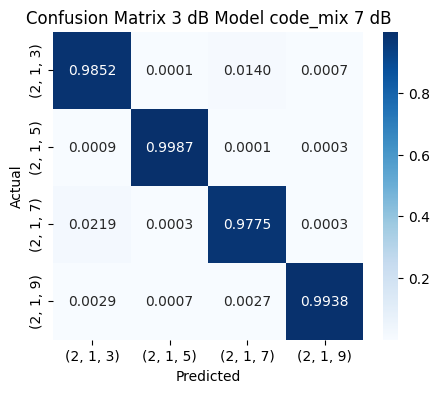

SNR: 8 dB, BER: 0.1237883344
SNR: 8 dB, ACC: 0.98775


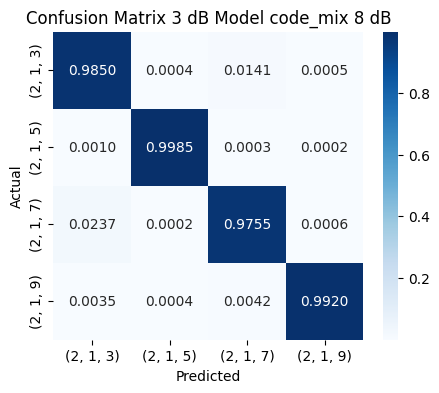

SNR: 9 dB, BER: 0.1240374967
SNR: 9 dB, ACC: 0.9882


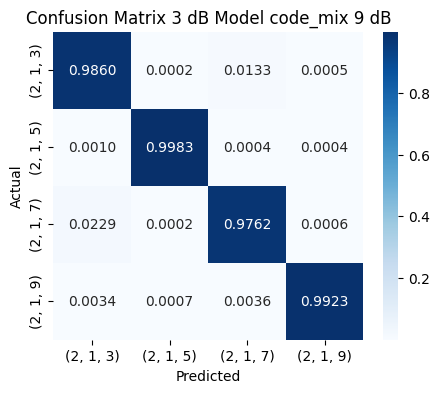

SNR: 10 dB, BER: 0.1237016693
SNR: 10 dB, ACC: 0.98843


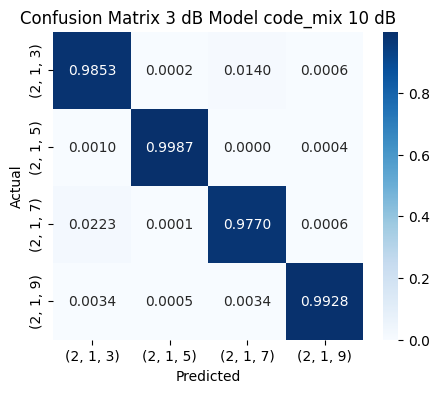

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_mix_3dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_2_code_mix_3dB.pkl
SNR: 1 dB, BER: 0.1445941627
SNR: 1 dB, ACC: 0.8222


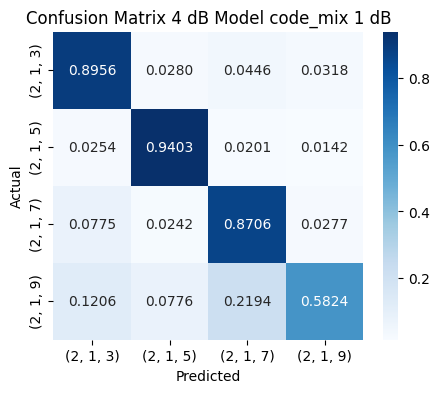

SNR: 2 dB, BER: 0.127744168
SNR: 2 dB, ACC: 0.85914


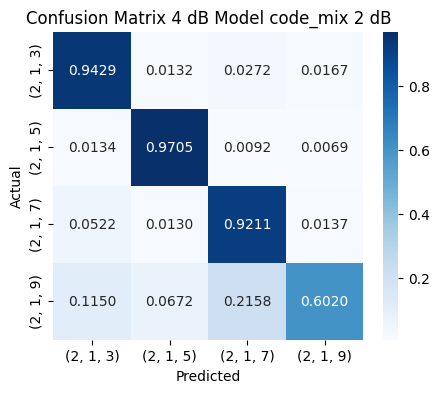

SNR: 3 dB, BER: 0.1190916672
SNR: 3 dB, ACC: 0.8775


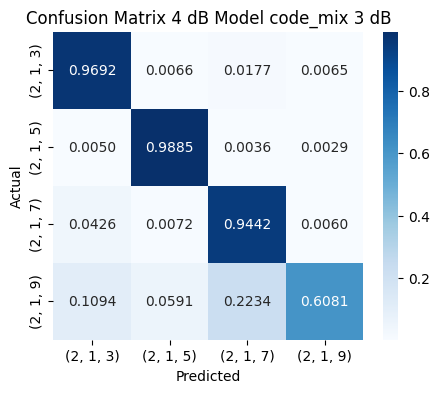

SNR: 4 dB, BER: 0.1152525023
SNR: 4 dB, ACC: 0.88639


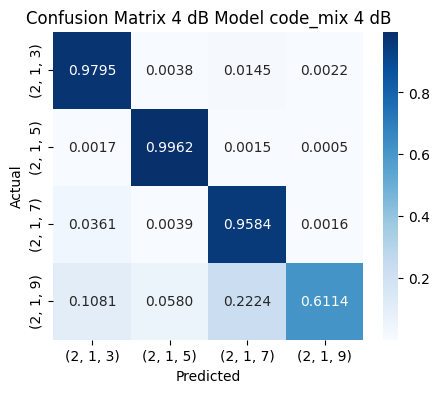

SNR: 5 dB, BER: 0.1138983294
SNR: 5 dB, ACC: 0.89071


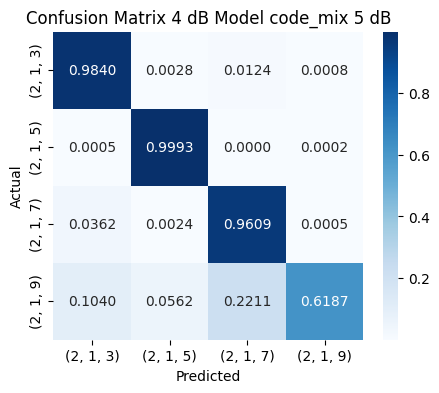

SNR: 6 dB, BER: 0.1130116656
SNR: 6 dB, ACC: 0.89125


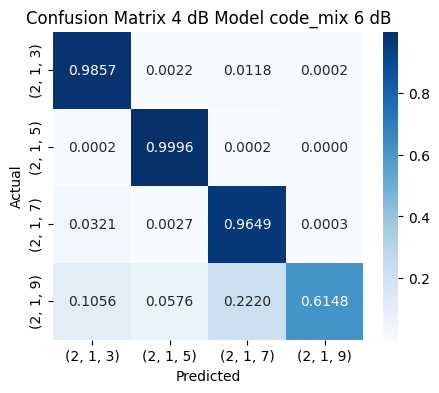

SNR: 7 dB, BER: 0.1127166674
SNR: 7 dB, ACC: 0.89045


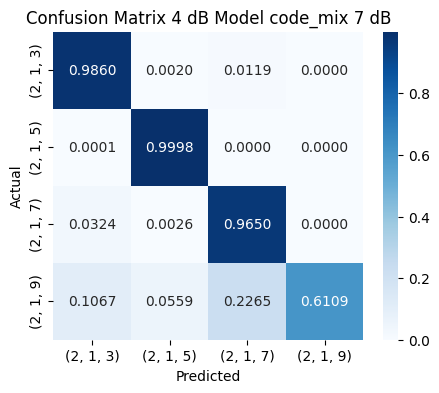

SNR: 8 dB, BER: 0.1128541678
SNR: 8 dB, ACC: 0.89092


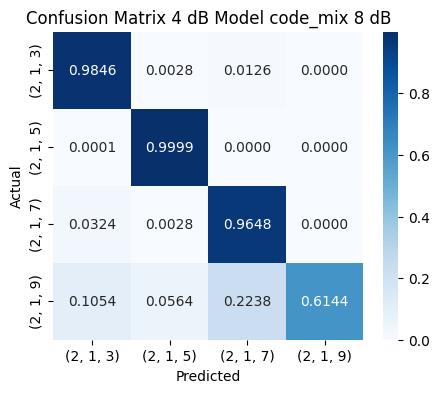

SNR: 9 dB, BER: 0.113167502
SNR: 9 dB, ACC: 0.89131


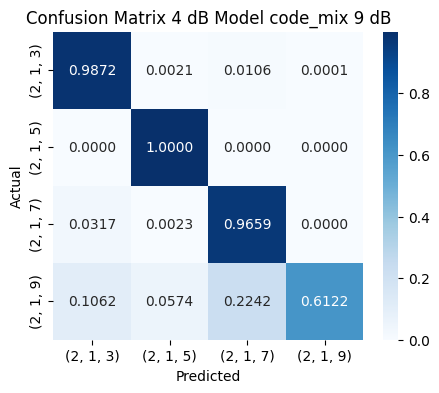

SNR: 10 dB, BER: 0.1126774997
SNR: 10 dB, ACC: 0.89113


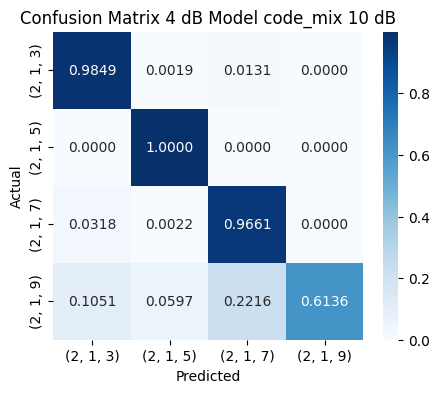

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_mix_4dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_2_code_mix_4dB.pkl
SNR: 1 dB, BER: 0.157447502
SNR: 1 dB, ACC: 0.82652


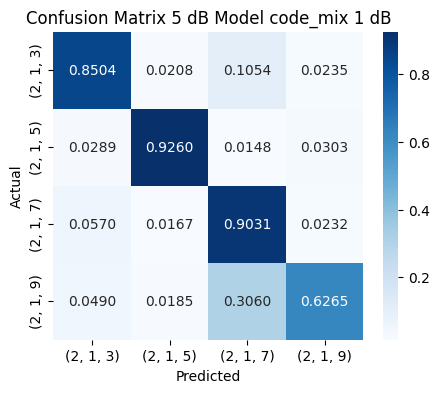

SNR: 2 dB, BER: 0.1413058341
SNR: 2 dB, ACC: 0.86335


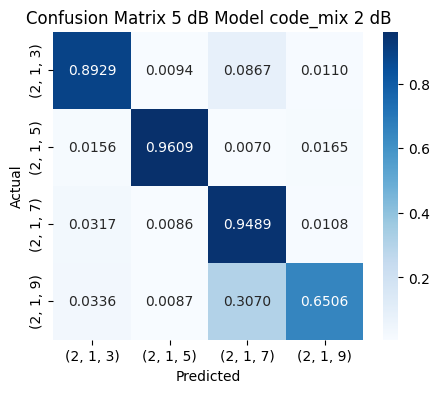

SNR: 3 dB, BER: 0.1322483271
SNR: 3 dB, ACC: 0.88821


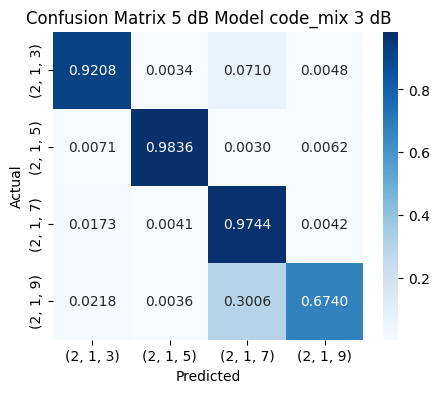

SNR: 4 dB, BER: 0.1279033273
SNR: 4 dB, ACC: 0.89634


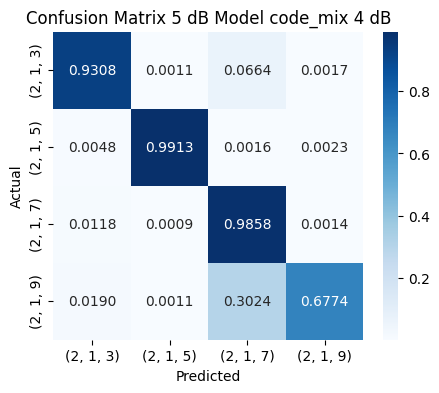

SNR: 5 dB, BER: 0.126488328
SNR: 5 dB, ACC: 0.89905


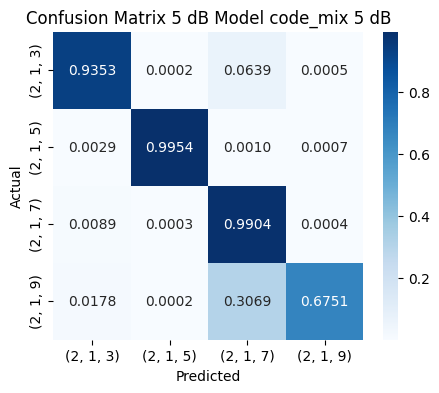

SNR: 6 dB, BER: 0.1260624975
SNR: 6 dB, ACC: 0.89991


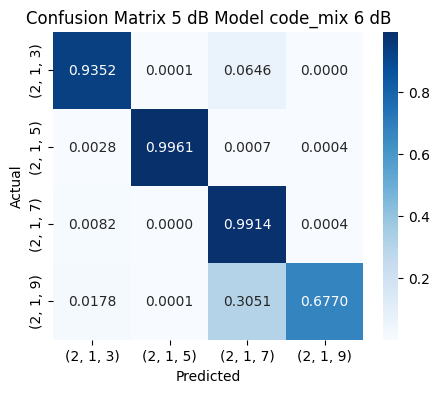

SNR: 7 dB, BER: 0.1260599941
SNR: 7 dB, ACC: 0.90166


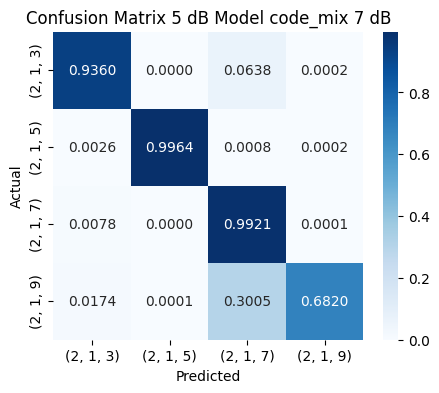

SNR: 8 dB, BER: 0.1255474985
SNR: 8 dB, ACC: 0.90167


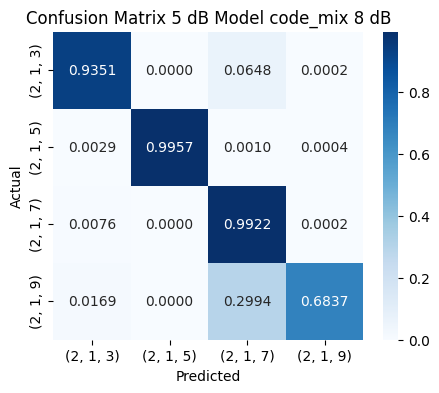

SNR: 9 dB, BER: 0.125319168
SNR: 9 dB, ACC: 0.90174


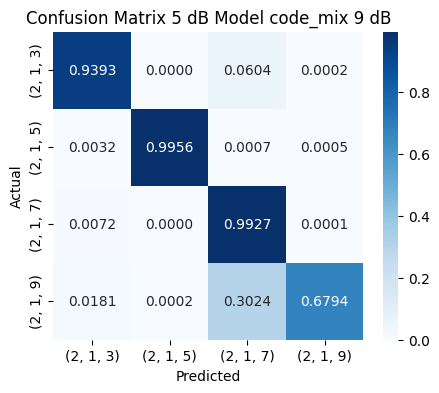

SNR: 10 dB, BER: 0.125682503
SNR: 10 dB, ACC: 0.90163


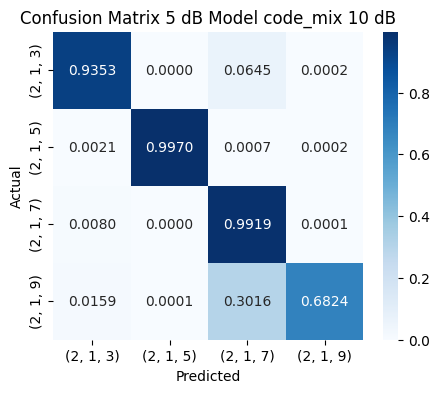

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_mix_5dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_2_code_mix_5dB.pkl
SNR: 1 dB, BER: 0.1425641626
SNR: 1 dB, ACC: 0.87994


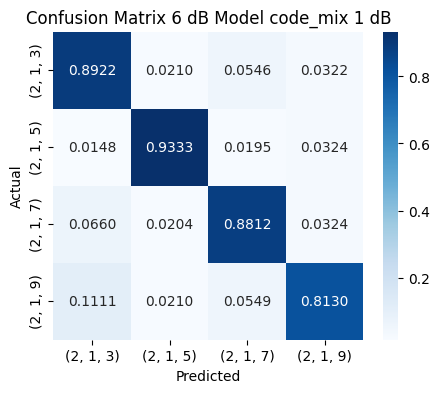

SNR: 2 dB, BER: 0.1253399998
SNR: 2 dB, ACC: 0.91987


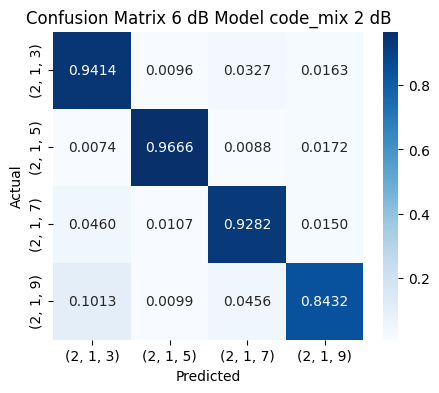

SNR: 3 dB, BER: 0.1157666668
SNR: 3 dB, ACC: 0.9414


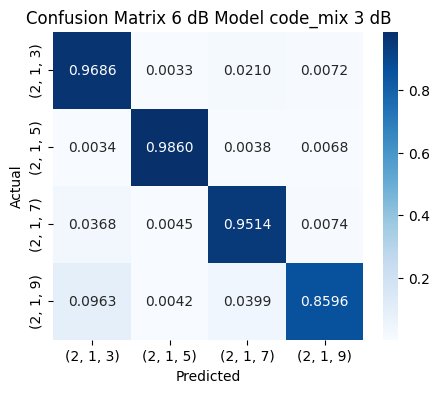

SNR: 4 dB, BER: 0.1118991673
SNR: 4 dB, ACC: 0.952


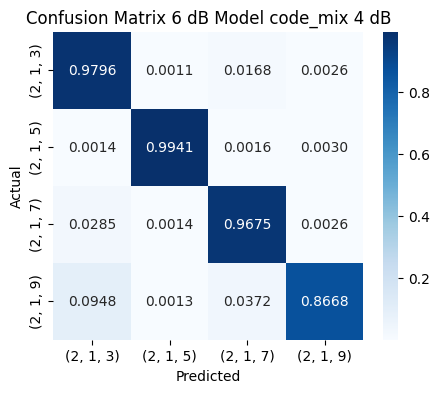

SNR: 5 dB, BER: 0.1095891669
SNR: 5 dB, ACC: 0.95533


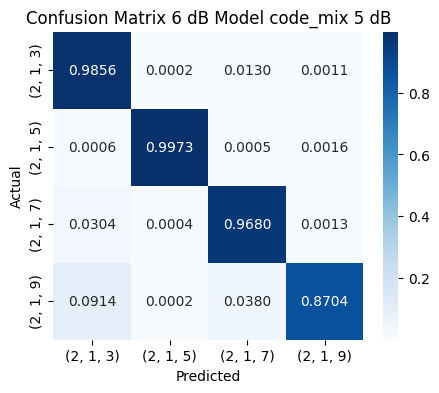

SNR: 6 dB, BER: 0.109419167
SNR: 6 dB, ACC: 0.95646


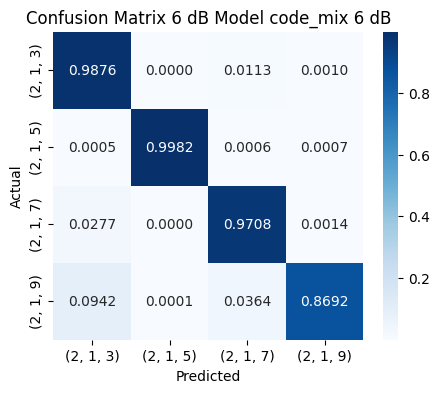

SNR: 7 dB, BER: 0.1094183326
SNR: 7 dB, ACC: 0.95771


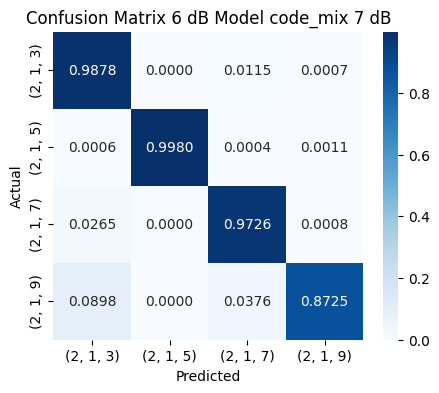

SNR: 8 dB, BER: 0.1088883355
SNR: 8 dB, ACC: 0.95716


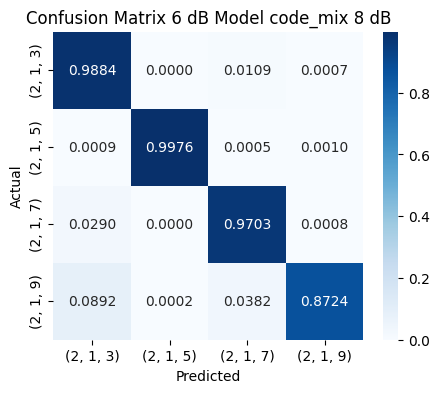

SNR: 9 dB, BER: 0.1094766632
SNR: 9 dB, ACC: 0.9576


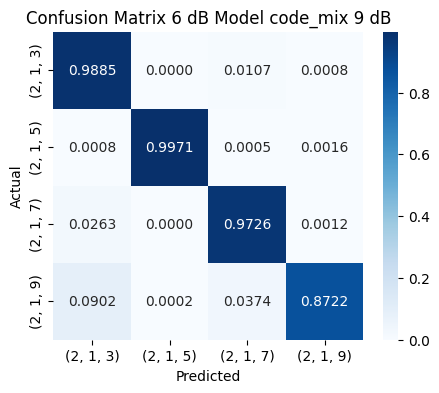

SNR: 10 dB, BER: 0.1090966687
SNR: 10 dB, ACC: 0.95709


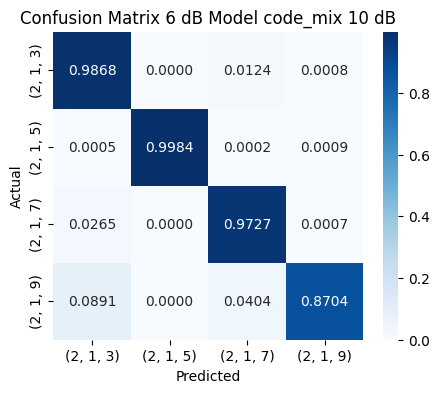

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_mix_6dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_2_code_mix_6dB.pkl
SNR: 1 dB, BER: 0.151109159
SNR: 1 dB, ACC: 0.80998


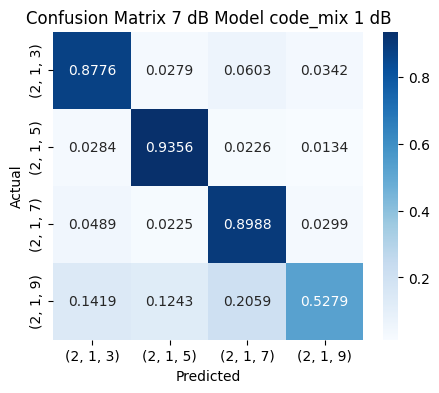

SNR: 2 dB, BER: 0.1355600059
SNR: 2 dB, ACC: 0.84711


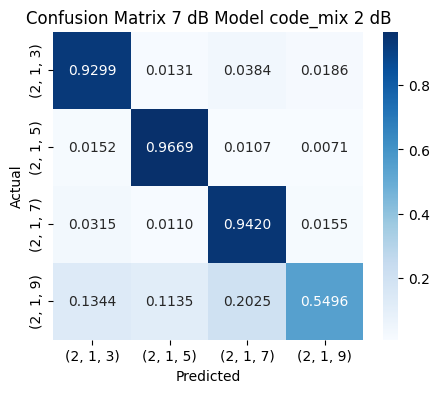

SNR: 3 dB, BER: 0.1266933382
SNR: 3 dB, ACC: 0.86567


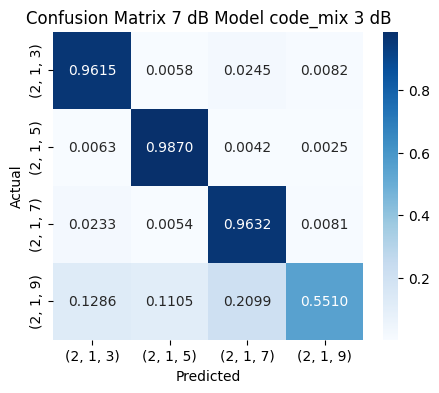

SNR: 4 dB, BER: 0.1224749982
SNR: 4 dB, ACC: 0.87598


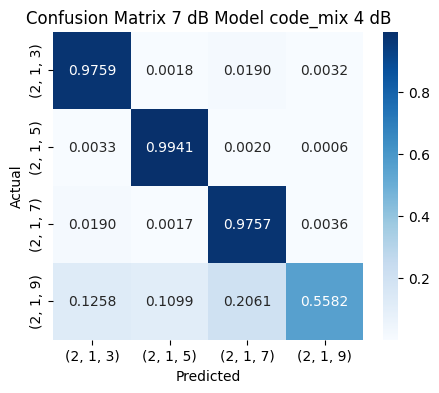

SNR: 5 dB, BER: 0.1211591661
SNR: 5 dB, ACC: 0.88046


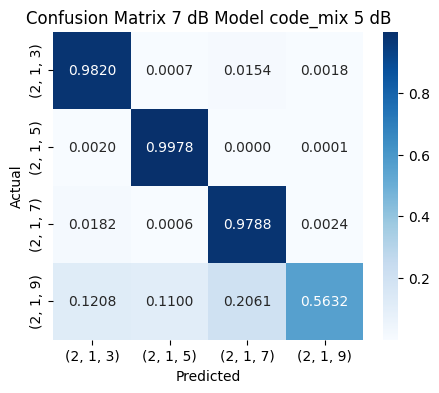

SNR: 6 dB, BER: 0.1208333299
SNR: 6 dB, ACC: 0.88073


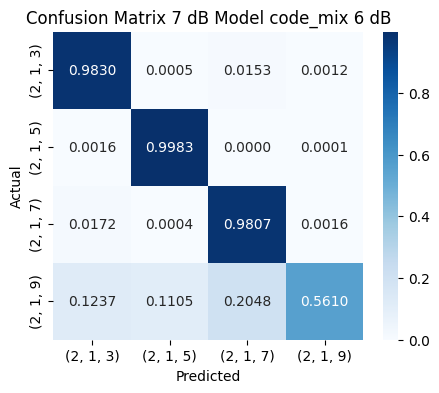

SNR: 7 dB, BER: 0.1209533364
SNR: 7 dB, ACC: 0.87957


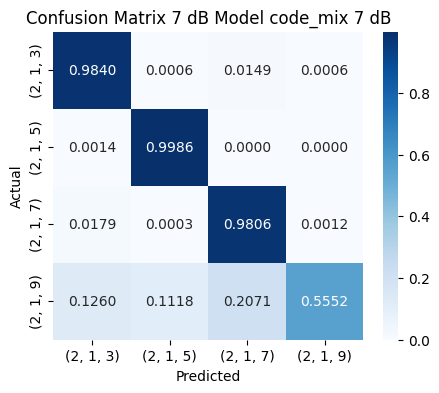

SNR: 8 dB, BER: 0.1204566658
SNR: 8 dB, ACC: 0.87981


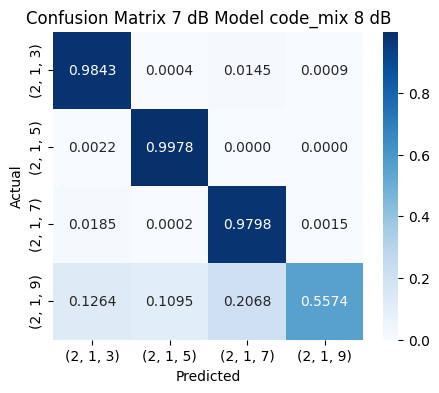

SNR: 9 dB, BER: 0.1202641651
SNR: 9 dB, ACC: 0.87976


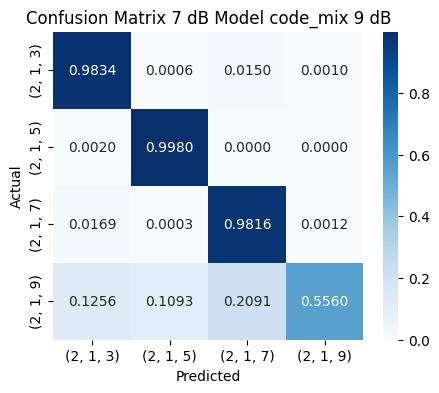

SNR: 10 dB, BER: 0.1206666678
SNR: 10 dB, ACC: 0.8809


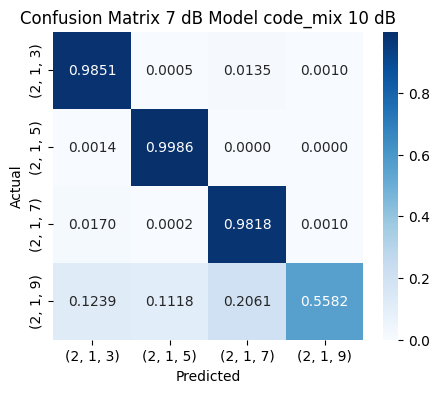

/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_Joint_Gumbel_2_code_mix_7dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/ACC_CCNN_Joint_Gumbel_2_code_mix_7dB.pkl


In [5]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=9, SNR_model=SNR_model, test_range=test_range)

## Test CCNN Independent (True)

In [6]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs = testing.test_model(device, config, result_dir, code_name=code_name, model_idx=5, SNR_model=SNR_model, test_range=test_range)

SNR: 1 dB, BER: 0.0855633318
SNR: 2 dB, BER: 0.0780891702
SNR: 3 dB, BER: 0.074361667
SNR: 4 dB, BER: 0.0722175017
SNR: 5 dB, BER: 0.0718400031
SNR: 6 dB, BER: 0.0718616694
SNR: 7 dB, BER: 0.071739167
SNR: 8 dB, BER: 0.0712950006
SNR: 9 dB, BER: 0.0715116635
SNR: 10 dB, BER: 0.0715325028
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_FM_2L_code_1_2dB.pkl
SNR: 1 dB, BER: 0.0595650002
SNR: 2 dB, BER: 0.0507283323
SNR: 3 dB, BER: 0.045721665
SNR: 4 dB, BER: 0.0435466655
SNR: 5 dB, BER: 0.0428050011
SNR: 6 dB, BER: 0.0424350016
SNR: 7 dB, BER: 0.0428174995
SNR: 8 dB, BER: 0.0425033346
SNR: 9 dB, BER: 0.0423158333
SNR: 10 dB, BER: 0.0426308326
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_FM_2L_code_1_3dB.pkl
SNR: 1 dB, BER: 0.0592399985
SNR: 2 dB, BER: 0.0493791662
SNR: 3 dB, BER: 0.0441491678
SNR: 4 dB, BER: 0.0417158343
SNR: 5 dB, BER: 0.0410825014
SNR: 6 dB, BER: 0.0407658331
SNR

## Train Classifier

In [7]:
for SNR_model in train_range:
    print(f"Train CNN Model with SNR = {SNR_model} dB")
    training.train_classifier(device, config, result_dir, code_name=train_code, SNR_model=SNR_model)

Train CNN Model with SNR = 2 dB
Epoch 1: [30000 / 100000] (30 %)  Loss: 1.473668  Accuracy: 0.249633
Epoch 1: [60000 / 100000] (60 %)  Loss: 1.500335  Accuracy: 0.249667
Epoch 1: [90000 / 100000] (90 %)  Loss: 1.437002  Accuracy: 0.250467
Epoch 2: [30000 / 100000] (30 %)  Loss: 1.487002  Accuracy: 0.253767
Epoch 2: [60000 / 100000] (60 %)  Loss: 1.507002  Accuracy: 0.250717
Epoch 2: [90000 / 100000] (90 %)  Loss: 1.490335  Accuracy: 0.250167
Epoch 3: [30000 / 100000] (30 %)  Loss: 1.417002  Accuracy: 0.249467
Epoch 3: [60000 / 100000] (60 %)  Loss: 1.490335  Accuracy: 0.250600
Epoch 3: [90000 / 100000] (90 %)  Loss: 1.507002  Accuracy: 0.250111
Epoch 4: [30000 / 100000] (30 %)  Loss: 1.500335  Accuracy: 0.250000
Epoch 4: [60000 / 100000] (60 %)  Loss: 1.433668  Accuracy: 0.250483
Epoch 4: [90000 / 100000] (90 %)  Loss: 1.520335  Accuracy: 0.249322
Epoch 5: [30000 / 100000] (30 %)  Loss: 1.517002  Accuracy: 0.250700
Epoch 5: [60000 / 100000] (60 %)  Loss: 1.487002  Accuracy: 0.251450
Ep

## Test Classifier

Test Classifier for code_1, SNR = 2 dB
SNR: 1 dB, ACC: 0.0
SNR: 2 dB, ACC: 0.0
SNR: 3 dB, ACC: 0.0
SNR: 4 dB, ACC: 0.0
SNR: 5 dB, ACC: 0.0
SNR: 6 dB, ACC: 0.0
SNR: 7 dB, ACC: 0.0
SNR: 8 dB, ACC: 0.0
SNR: 9 dB, ACC: 0.0
SNR: 10 dB, ACC: 0.0
Test Classifier for code_2, SNR = 2 dB
SNR: 1 dB, ACC: 1.0
SNR: 2 dB, ACC: 1.0
SNR: 3 dB, ACC: 1.0
SNR: 4 dB, ACC: 1.0
SNR: 5 dB, ACC: 1.0
SNR: 6 dB, ACC: 1.0
SNR: 7 dB, ACC: 1.0
SNR: 8 dB, ACC: 1.0
SNR: 9 dB, ACC: 1.0
SNR: 10 dB, ACC: 1.0
Test Classifier for code_3, SNR = 2 dB
SNR: 1 dB, ACC: 0.0
SNR: 2 dB, ACC: 0.0
SNR: 3 dB, ACC: 0.0
SNR: 4 dB, ACC: 0.0
SNR: 5 dB, ACC: 0.0
SNR: 6 dB, ACC: 0.0
SNR: 7 dB, ACC: 0.0
SNR: 8 dB, ACC: 0.0
SNR: 9 dB, ACC: 0.0
SNR: 10 dB, ACC: 0.0
Test Classifier for code_4, SNR = 2 dB
SNR: 1 dB, ACC: 0.0
SNR: 2 dB, ACC: 0.0
SNR: 3 dB, ACC: 0.0
SNR: 4 dB, ACC: 0.0
SNR: 5 dB, ACC: 0.0
SNR: 6 dB, ACC: 0.0
SNR: 7 dB, ACC: 0.0
SNR: 8 dB, ACC: 0.0
SNR: 9 dB, ACC: 0.0
SNR: 10 dB, ACC: 0.0
Test Classifier for code_mix, SNR = 2 dB

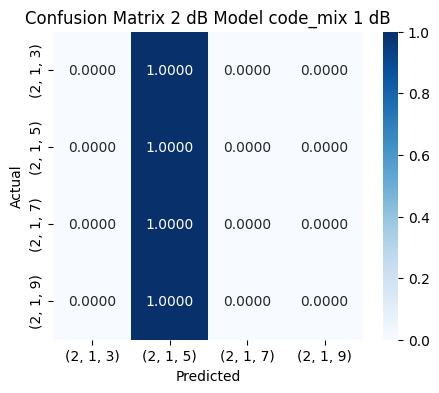

SNR: 1 dB, ACC: 0.25


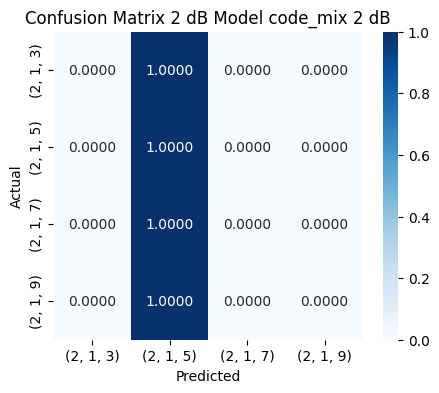

SNR: 2 dB, ACC: 0.25


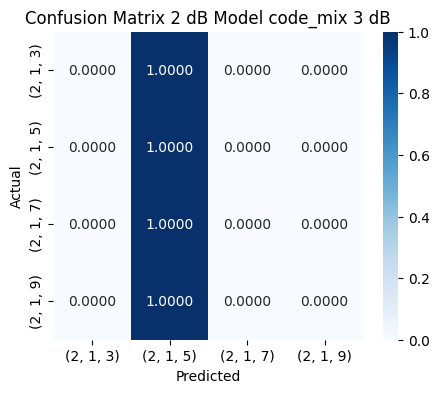

SNR: 3 dB, ACC: 0.25


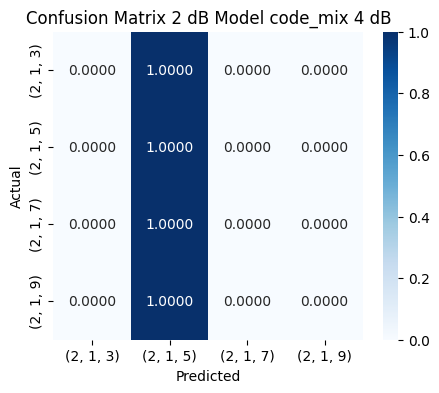

SNR: 4 dB, ACC: 0.25


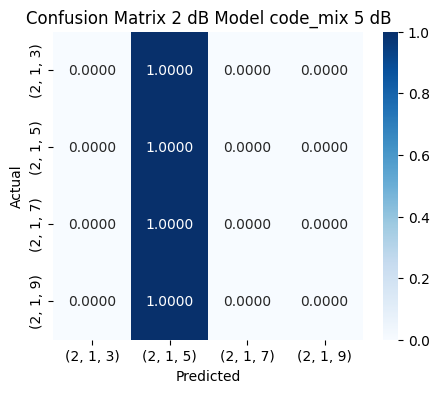

SNR: 5 dB, ACC: 0.25


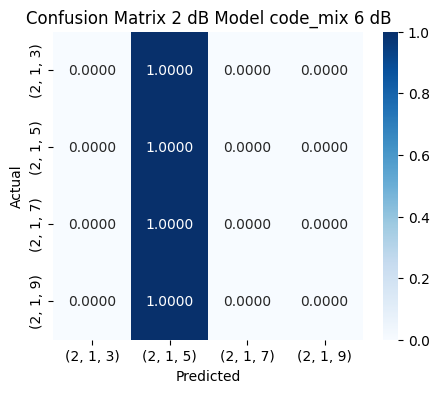

SNR: 6 dB, ACC: 0.25


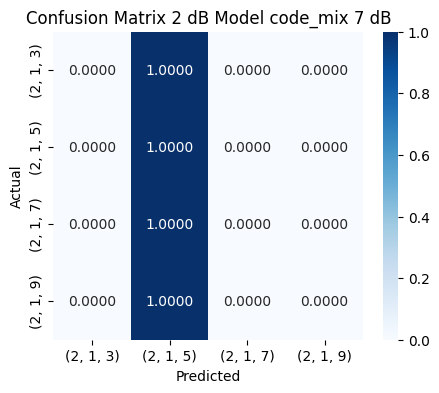

SNR: 7 dB, ACC: 0.25


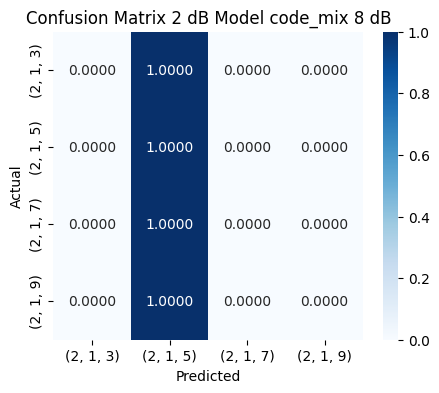

SNR: 8 dB, ACC: 0.25


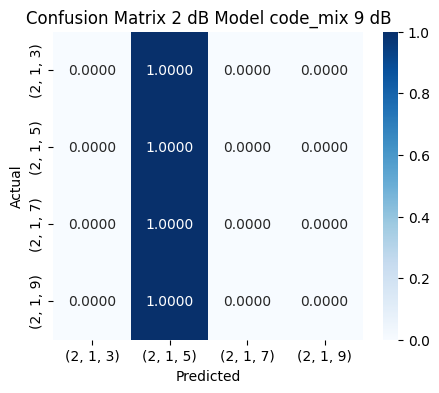

SNR: 9 dB, ACC: 0.25


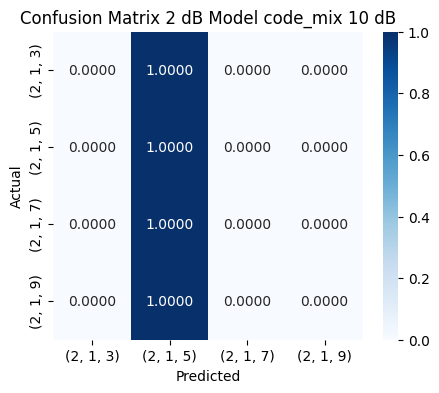

SNR: 10 dB, ACC: 0.25
Test Classifier for code_1, SNR = 3 dB
SNR: 1 dB, ACC: 0.89646
SNR: 2 dB, ACC: 0.9359
SNR: 3 dB, ACC: 0.95923
SNR: 4 dB, ACC: 0.96737
SNR: 5 dB, ACC: 0.97045
SNR: 6 dB, ACC: 0.97084
SNR: 7 dB, ACC: 0.97284
SNR: 8 dB, ACC: 0.97099
SNR: 9 dB, ACC: 0.97204
SNR: 10 dB, ACC: 0.97192
Test Classifier for code_2, SNR = 3 dB
SNR: 1 dB, ACC: 0.94454
SNR: 2 dB, ACC: 0.97362
SNR: 3 dB, ACC: 0.98844
SNR: 4 dB, ACC: 0.99568
SNR: 5 dB, ACC: 0.99854
SNR: 6 dB, ACC: 0.99914
SNR: 7 dB, ACC: 0.99921
SNR: 8 dB, ACC: 0.9991
SNR: 9 dB, ACC: 0.99916
SNR: 10 dB, ACC: 0.9993
Test Classifier for code_3, SNR = 3 dB
SNR: 1 dB, ACC: 0.91067
SNR: 2 dB, ACC: 0.95391
SNR: 3 dB, ACC: 0.97793
SNR: 4 dB, ACC: 0.98764
SNR: 5 dB, ACC: 0.9912
SNR: 6 dB, ACC: 0.99248
SNR: 7 dB, ACC: 0.99264
SNR: 8 dB, ACC: 0.99313
SNR: 9 dB, ACC: 0.99271
SNR: 10 dB, ACC: 0.99258
Test Classifier for code_4, SNR = 3 dB
SNR: 1 dB, ACC: 0.93784
SNR: 2 dB, ACC: 0.96813
SNR: 3 dB, ACC: 0.98528
SNR: 4 dB, ACC: 0.99265
SNR: 5 

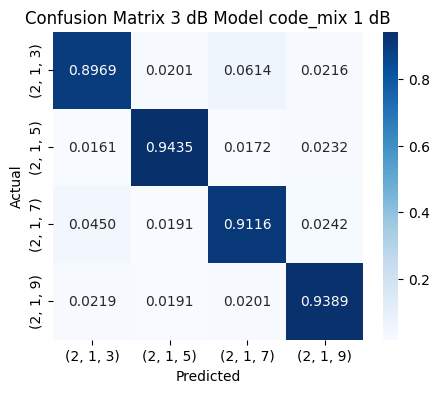

SNR: 1 dB, ACC: 0.92273


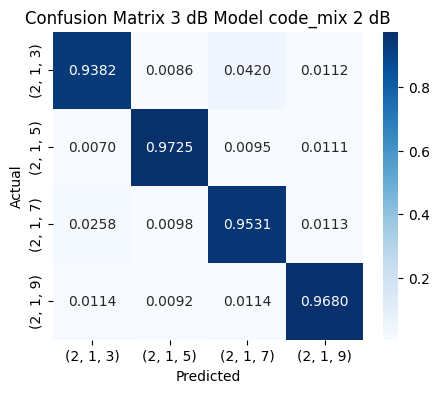

SNR: 2 dB, ACC: 0.95796


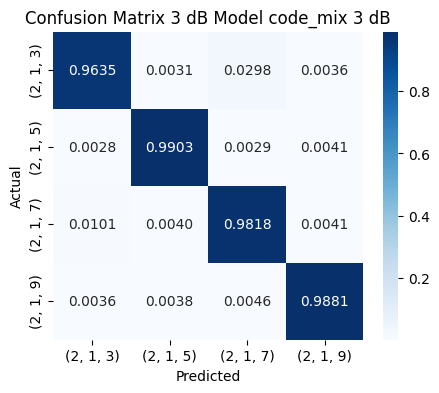

SNR: 3 dB, ACC: 0.98092


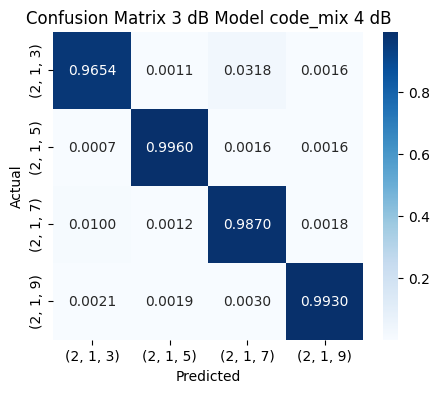

SNR: 4 dB, ACC: 0.98537


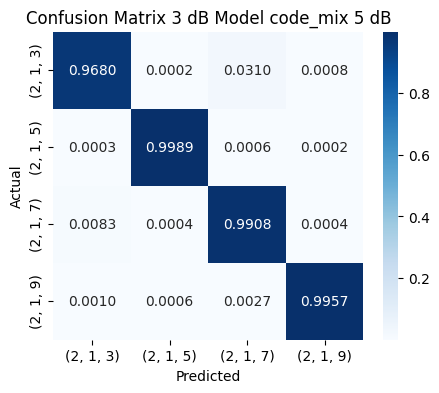

SNR: 5 dB, ACC: 0.98836


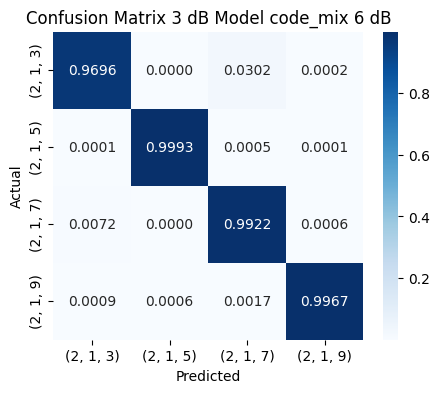

SNR: 6 dB, ACC: 0.98943


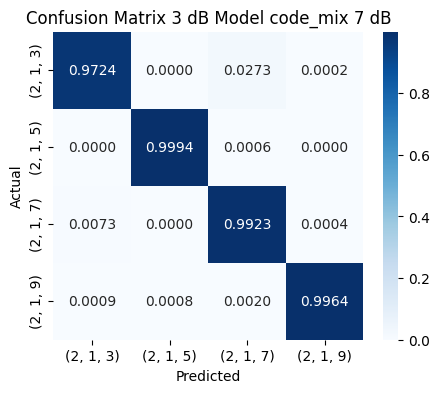

SNR: 7 dB, ACC: 0.99012


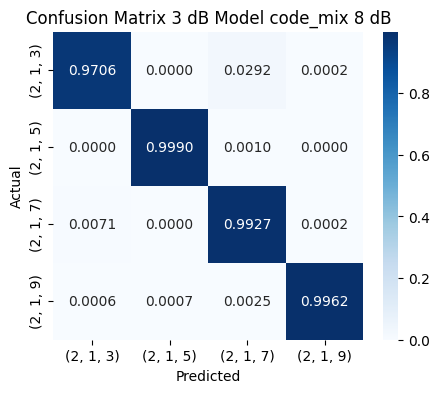

SNR: 8 dB, ACC: 0.98961


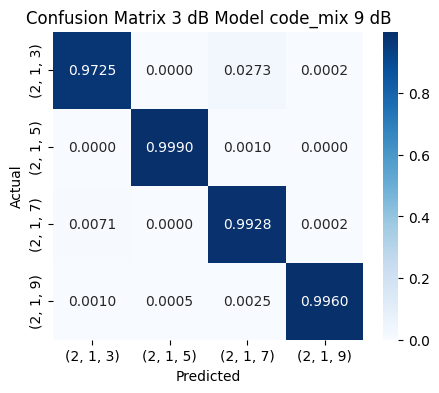

SNR: 9 dB, ACC: 0.99007


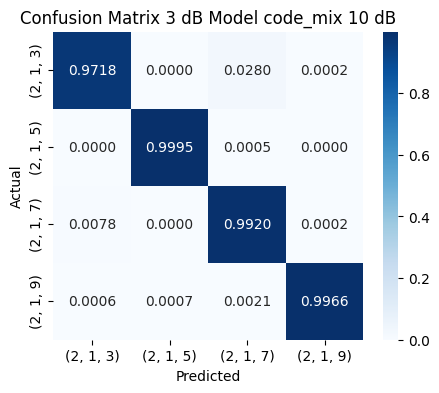

SNR: 10 dB, ACC: 0.98998
Test Classifier for code_1, SNR = 4 dB
SNR: 1 dB, ACC: 0.88436
SNR: 2 dB, ACC: 0.93571
SNR: 3 dB, ACC: 0.96299
SNR: 4 dB, ACC: 0.97669
SNR: 5 dB, ACC: 0.98005
SNR: 6 dB, ACC: 0.98102
SNR: 7 dB, ACC: 0.98213
SNR: 8 dB, ACC: 0.98194
SNR: 9 dB, ACC: 0.98193
SNR: 10 dB, ACC: 0.98184
Test Classifier for code_2, SNR = 4 dB
SNR: 1 dB, ACC: 0.94482
SNR: 2 dB, ACC: 0.97358
SNR: 3 dB, ACC: 0.98837
SNR: 4 dB, ACC: 0.99596
SNR: 5 dB, ACC: 0.99849
SNR: 6 dB, ACC: 0.99916
SNR: 7 dB, ACC: 0.99921
SNR: 8 dB, ACC: 0.9991
SNR: 9 dB, ACC: 0.99916
SNR: 10 dB, ACC: 0.9993
Test Classifier for code_3, SNR = 4 dB
SNR: 1 dB, ACC: 0.91291
SNR: 2 dB, ACC: 0.95538
SNR: 3 dB, ACC: 0.978
SNR: 4 dB, ACC: 0.98912
SNR: 5 dB, ACC: 0.99208
SNR: 6 dB, ACC: 0.99285
SNR: 7 dB, ACC: 0.99351
SNR: 8 dB, ACC: 0.99296
SNR: 9 dB, ACC: 0.99331
SNR: 10 dB, ACC: 0.99321
Test Classifier for code_4, SNR = 4 dB
SNR: 1 dB, ACC: 0.94076
SNR: 2 dB, ACC: 0.96991
SNR: 3 dB, ACC: 0.9845
SNR: 4 dB, ACC: 0.99236
SNR: 

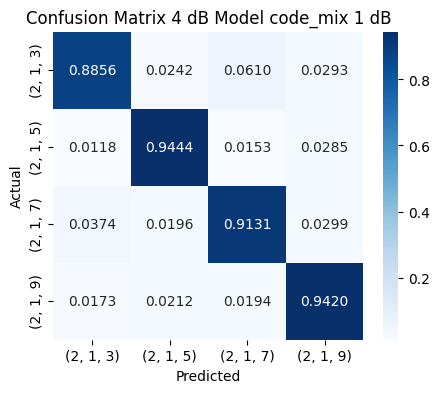

SNR: 1 dB, ACC: 0.9213


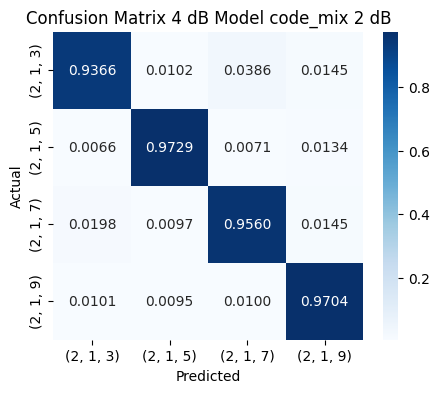

SNR: 2 dB, ACC: 0.95899


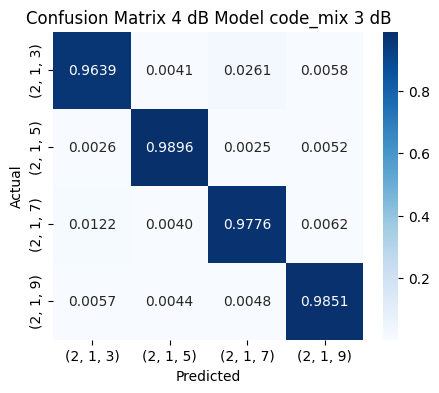

SNR: 3 dB, ACC: 0.97906


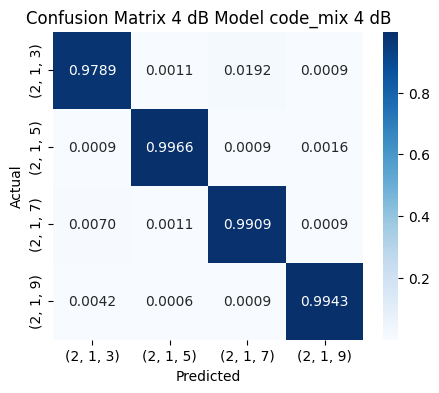

SNR: 4 dB, ACC: 0.99016


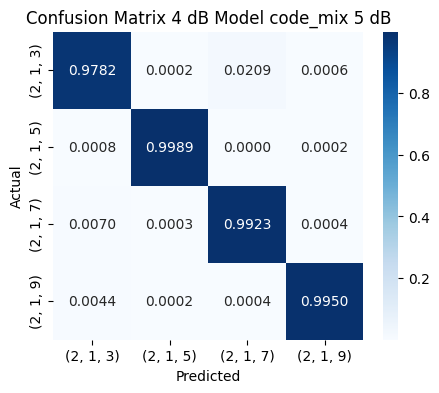

SNR: 5 dB, ACC: 0.99112


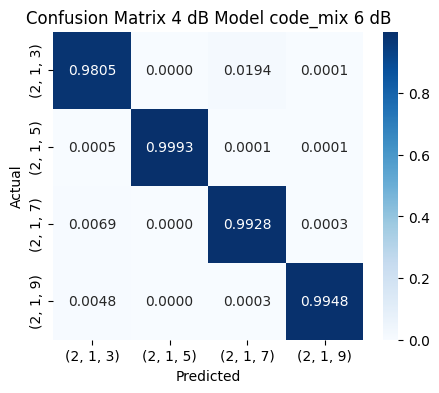

SNR: 6 dB, ACC: 0.99186


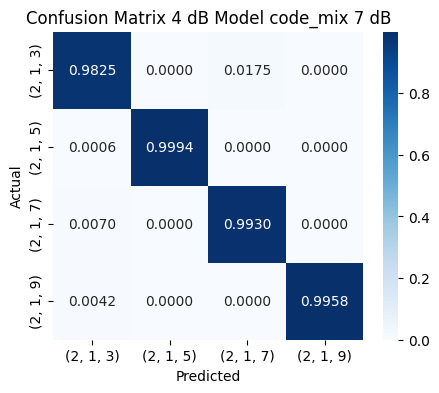

SNR: 7 dB, ACC: 0.99267


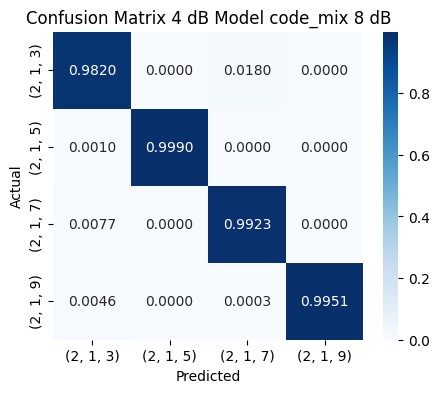

SNR: 8 dB, ACC: 0.99209


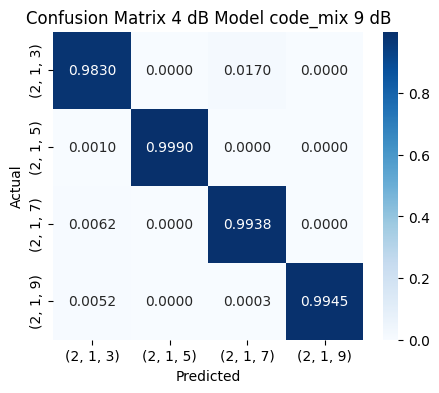

SNR: 9 dB, ACC: 0.99259


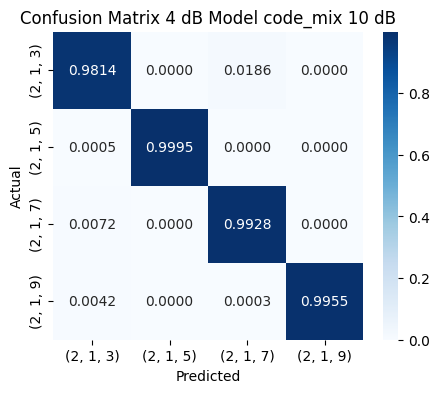

SNR: 10 dB, ACC: 0.9923
Test Classifier for code_1, SNR = 5 dB
SNR: 1 dB, ACC: 0.89337
SNR: 2 dB, ACC: 0.94497
SNR: 3 dB, ACC: 0.97289
SNR: 4 dB, ACC: 0.98601
SNR: 5 dB, ACC: 0.99016
SNR: 6 dB, ACC: 0.99172
SNR: 7 dB, ACC: 0.99236
SNR: 8 dB, ACC: 0.99186
SNR: 9 dB, ACC: 0.99183
SNR: 10 dB, ACC: 0.99189
Test Classifier for code_2, SNR = 5 dB
SNR: 1 dB, ACC: 0.94694
SNR: 2 dB, ACC: 0.97464
SNR: 3 dB, ACC: 0.98858
SNR: 4 dB, ACC: 0.9959
SNR: 5 dB, ACC: 0.99861
SNR: 6 dB, ACC: 0.99901
SNR: 7 dB, ACC: 0.99925
SNR: 8 dB, ACC: 0.99903
SNR: 9 dB, ACC: 0.99915
SNR: 10 dB, ACC: 0.99932
Test Classifier for code_3, SNR = 5 dB
SNR: 1 dB, ACC: 0.89414
SNR: 2 dB, ACC: 0.94096
SNR: 3 dB, ACC: 0.96742
SNR: 4 dB, ACC: 0.97913
SNR: 5 dB, ACC: 0.98321
SNR: 6 dB, ACC: 0.98407
SNR: 7 dB, ACC: 0.98522
SNR: 8 dB, ACC: 0.98489
SNR: 9 dB, ACC: 0.98476
SNR: 10 dB, ACC: 0.9848
Test Classifier for code_4, SNR = 5 dB
SNR: 1 dB, ACC: 0.95121
SNR: 2 dB, ACC: 0.97607
SNR: 3 dB, ACC: 0.98894
SNR: 4 dB, ACC: 0.99509
SNR

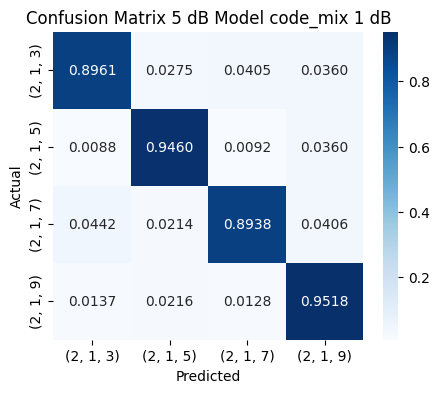

SNR: 1 dB, ACC: 0.92193


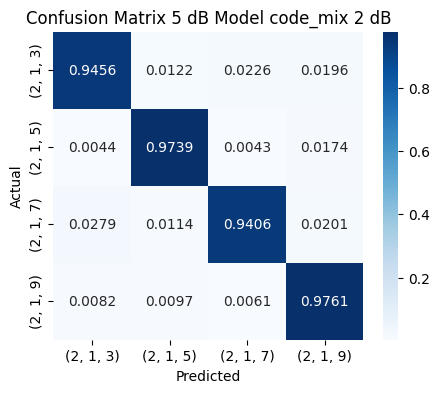

SNR: 2 dB, ACC: 0.95905


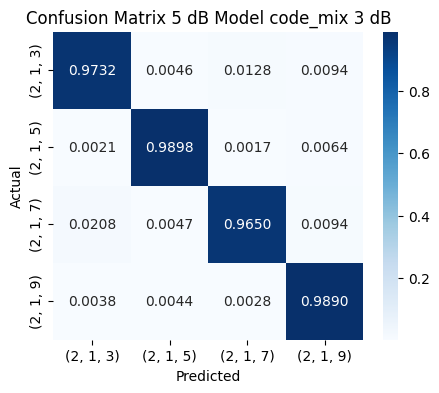

SNR: 3 dB, ACC: 0.97926


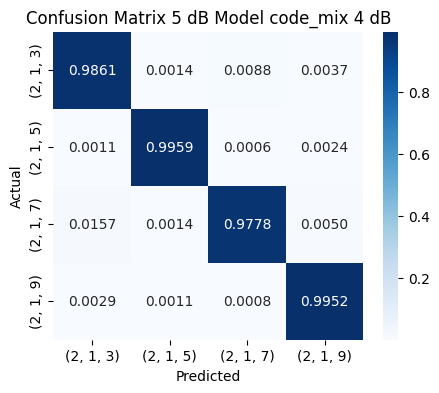

SNR: 4 dB, ACC: 0.98875


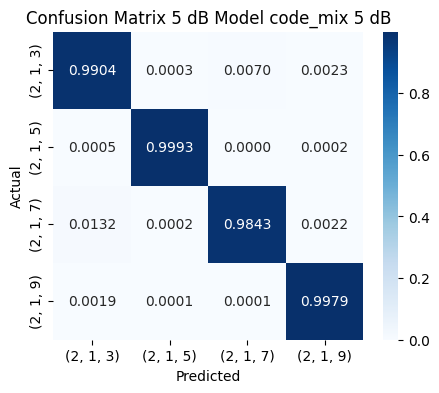

SNR: 5 dB, ACC: 0.99298


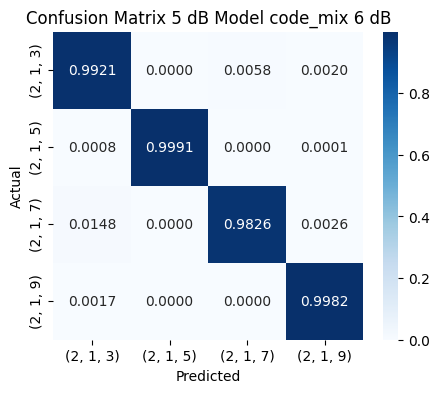

SNR: 6 dB, ACC: 0.993


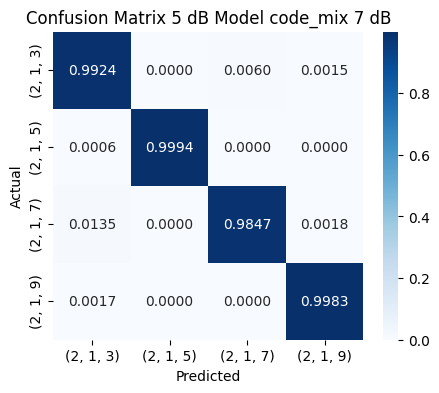

SNR: 7 dB, ACC: 0.99371


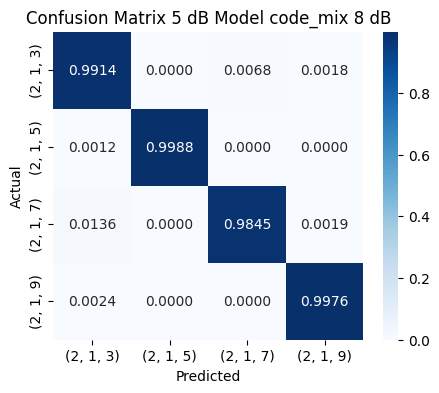

SNR: 8 dB, ACC: 0.99308


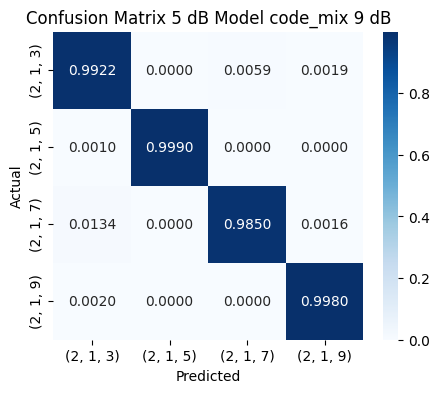

SNR: 9 dB, ACC: 0.99356


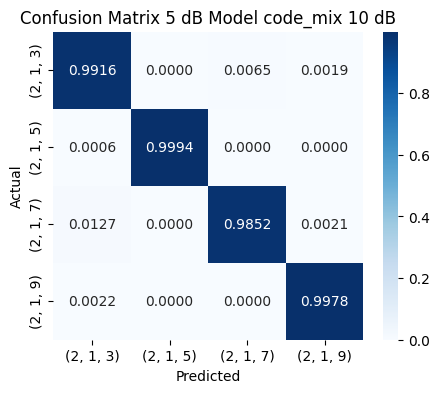

SNR: 10 dB, ACC: 0.9935
Test Classifier for code_1, SNR = 6 dB
SNR: 1 dB, ACC: 0.87027
SNR: 2 dB, ACC: 0.932
SNR: 3 dB, ACC: 0.96774
SNR: 4 dB, ACC: 0.98381
SNR: 5 dB, ACC: 0.98966
SNR: 6 dB, ACC: 0.99182
SNR: 7 dB, ACC: 0.9919
SNR: 8 dB, ACC: 0.99159
SNR: 9 dB, ACC: 0.99227
SNR: 10 dB, ACC: 0.99198
Test Classifier for code_2, SNR = 6 dB
SNR: 1 dB, ACC: 0.94598
SNR: 2 dB, ACC: 0.97471
SNR: 3 dB, ACC: 0.98861
SNR: 4 dB, ACC: 0.99601
SNR: 5 dB, ACC: 0.99872
SNR: 6 dB, ACC: 0.99937
SNR: 7 dB, ACC: 0.99946
SNR: 8 dB, ACC: 0.99928
SNR: 9 dB, ACC: 0.9994
SNR: 10 dB, ACC: 0.99954
Test Classifier for code_3, SNR = 6 dB
SNR: 1 dB, ACC: 0.907
SNR: 2 dB, ACC: 0.94985
SNR: 3 dB, ACC: 0.97211
SNR: 4 dB, ACC: 0.98289
SNR: 5 dB, ACC: 0.98574
SNR: 6 dB, ACC: 0.98713
SNR: 7 dB, ACC: 0.98767
SNR: 8 dB, ACC: 0.98694
SNR: 9 dB, ACC: 0.98766
SNR: 10 dB, ACC: 0.9878
Test Classifier for code_4, SNR = 6 dB
SNR: 1 dB, ACC: 0.95031
SNR: 2 dB, ACC: 0.97552
SNR: 3 dB, ACC: 0.98876
SNR: 4 dB, ACC: 0.99508
SNR: 5 d

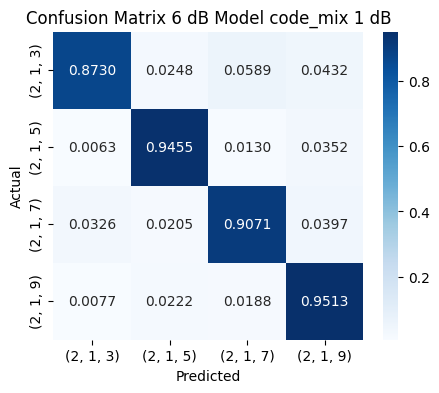

SNR: 1 dB, ACC: 0.91923


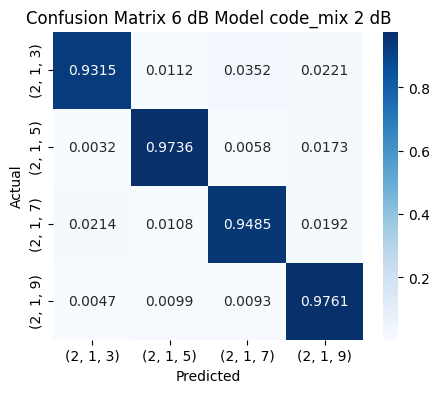

SNR: 2 dB, ACC: 0.95745


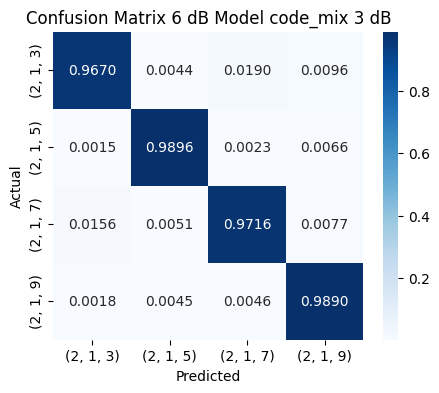

SNR: 3 dB, ACC: 0.97931


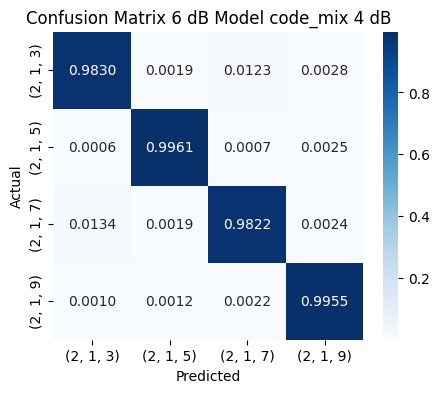

SNR: 4 dB, ACC: 0.98921


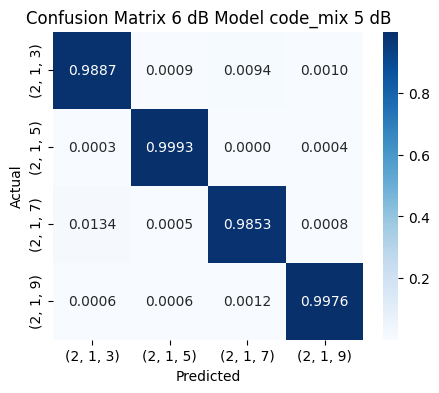

SNR: 5 dB, ACC: 0.99273


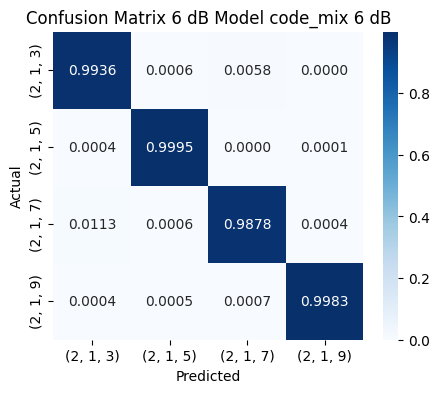

SNR: 6 dB, ACC: 0.99481


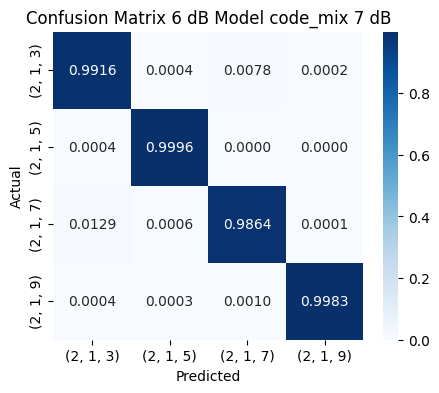

SNR: 7 dB, ACC: 0.99401


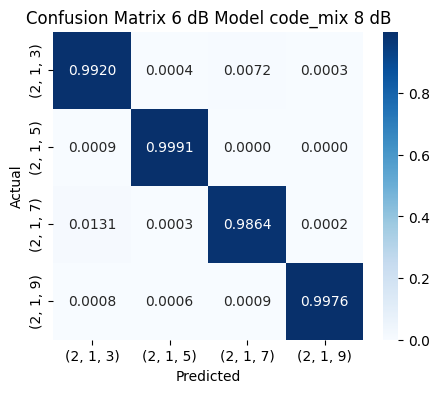

SNR: 8 dB, ACC: 0.99379


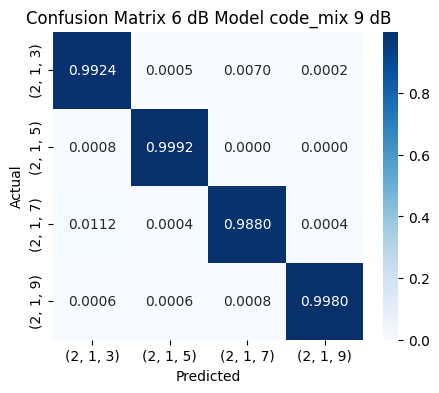

SNR: 9 dB, ACC: 0.9944


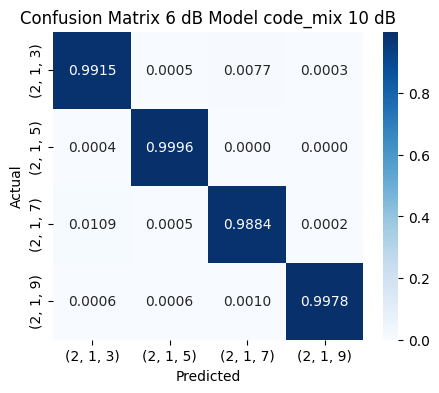

SNR: 10 dB, ACC: 0.99433
Test Classifier for code_1, SNR = 7 dB
SNR: 1 dB, ACC: 0.89558
SNR: 2 dB, ACC: 0.94226
SNR: 3 dB, ACC: 0.96749
SNR: 4 dB, ACC: 0.97813
SNR: 5 dB, ACC: 0.98253
SNR: 6 dB, ACC: 0.98359
SNR: 7 dB, ACC: 0.98479


In [8]:
for SNR_model in train_range:
    for code_name in code_names:
        print(f"Test Classifier for {code_name}, SNR = {SNR_model} dB")
        ACCs = testing.test_classifier(device, config, result_dir, code_name, SNR_model, test_range)

## Test CCNN_P

In [4]:
for code_name in code_names:
    for SNR_model in train_range:
        BERs, ACCs = testing.test_classifier_decoder(device, config, result_dir, code_name, 5, SNR_model, test_range)

SNR: 1 dB, ACC: 0.0, BER: 0.3322866559
SNR: 2 dB, ACC: 0.0, BER: 0.3287149966
SNR: 3 dB, ACC: 0.0, BER: 0.3259808421
SNR: 4 dB, ACC: 0.0, BER: 0.3241575062
SNR: 5 dB, ACC: 0.0, BER: 0.3243366778
SNR: 6 dB, ACC: 0.0, BER: 0.3248800039
SNR: 7 dB, ACC: 0.0, BER: 0.3246058226
SNR: 8 dB, ACC: 0.0, BER: 0.3241916597
SNR: 9 dB, ACC: 0.0, BER: 0.3246041536
SNR: 10 dB, ACC: 0.0, BER: 0.3241116703
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_FM_2L_classifier_BER_code_1_2dB.pkl
/home/jxyang/projects/Conditional_CNN_Decoder/results/ep500_dp01_2000_SNR2-7_FM150/records/test/CCNN_FM_2L_classifier_ACC_code_1_2dB.pkl
SNR: 1 dB, ACC: 0.89646, BER: 0.0850366652
SNR: 2 dB, ACC: 0.9359, BER: 0.0653349981
SNR: 3 dB, ACC: 0.95923, BER: 0.0538816676
SNR: 4 dB, ACC: 0.96737, BER: 0.0492333323
SNR: 5 dB, ACC: 0.97045, BER: 0.0474741682
SNR: 6 dB, ACC: 0.97084, BER: 0.0469833314
SNR: 7 dB, ACC: 0.97284, BER: 0.0469850004
SNR: 8 dB, ACC: 0.97099, BER: 0.046